___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
import pickle
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from ipywidgets import interact
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import load_model
plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# handel warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [ ]:
# pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.14.0'

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
#here, we read our data using the read_csv method.
df = pd.read_csv("1-Churn_Modelling.csv")

In [4]:
#to show our dataset.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
# So here i will print the full summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum().any()

False

In [7]:
#display compute statistics within the dataset like mean, std ,max and min to gain accurate insight into our data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [8]:
#I used shape method to represent the number of columns and rows .
df.shape

(10000, 14)

In [9]:
# here,we used nunique method to returns the number of unique values for each column.
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# After infestegate in data, I drop unnessseory coulm.
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [11]:
#to show our dataset.
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [12]:
#I used shape method to represent the number of columns and rows .
df.shape

(10000, 11)

In [13]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
# I used duplicated sum to determine whether or not our data had been duplicated.
df.duplicated().sum()

0

In [15]:
# so I'm checking this condition here ( A credit score is a number between 300–850 that depicts a consumer's creditworthiness)
#So, after checking, I have concolustion. No one with a credit score of less than 300.
df[(df["CreditScore"] < 300) & (df["HasCrCard"] == 1)].value_counts().sum()

0

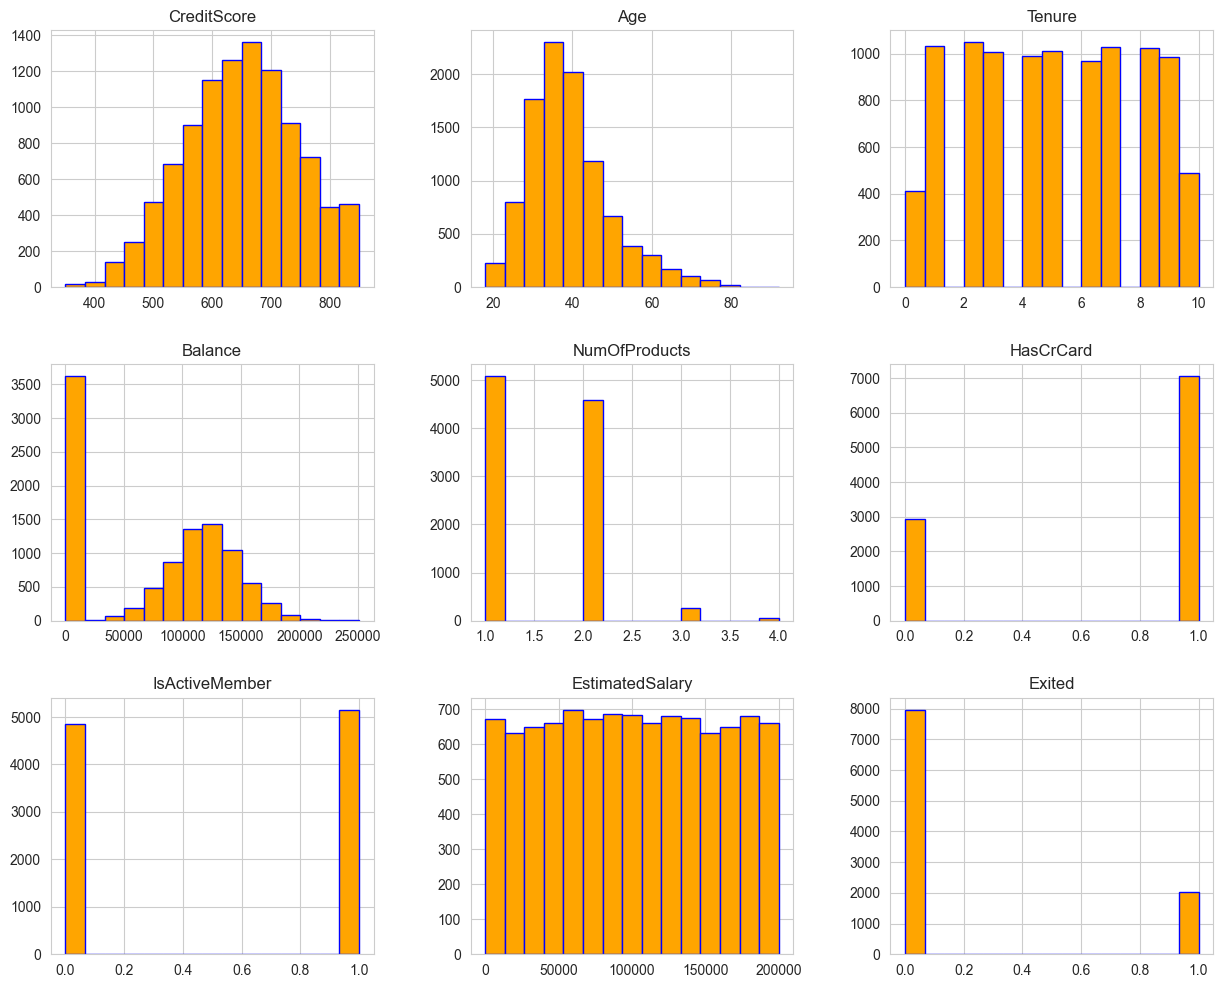

In [16]:
#I implemented a histogram to gain valuable insight into our data.
#As we can see, the credit score has a very normal distribution, but the average age of the population is between 29 and 40 years old and so on.
df.hist(figsize=(15, 12), bins=15, color='orange', edgecolor='blue')
plt.show()

(-1.25, 1.25, -1.25, 1.25)

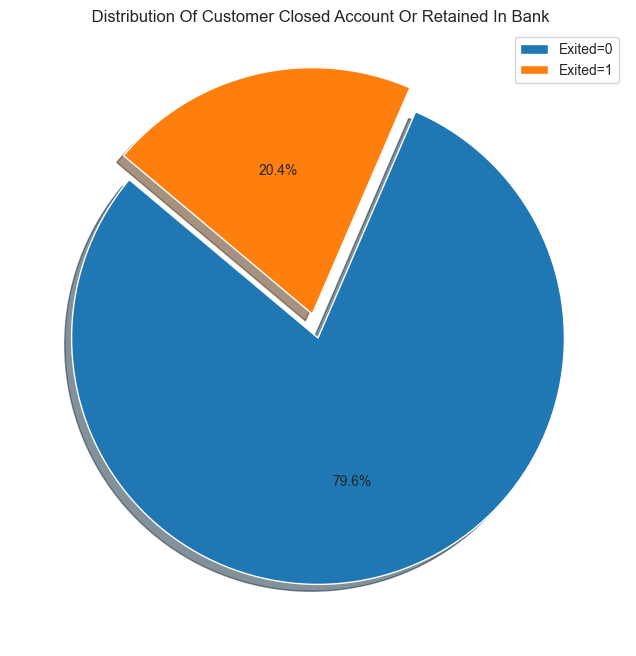

In [17]:
#As we can see from our target class imbalanced data, the number of persons retained is greater than the number of bank accounts canceled.
plt.figure(figsize=(8, 8))
explode = [0, 0.1]
plt.pie(df['Exited'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['Exited=0', 'Exited=1'])
plt.title(' Distribution Of Customer Closed Account Or Retained In Bank')
plt.axis('off')


(-1.25, 1.25, -1.25, 1.25)

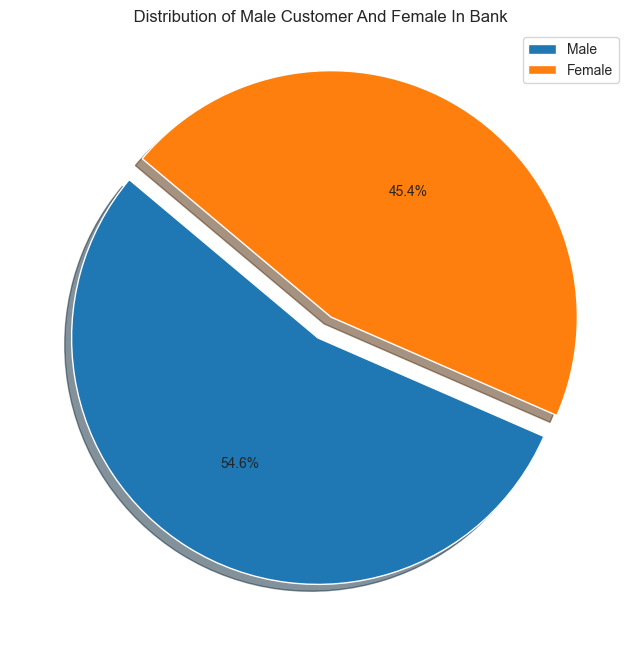

In [18]:
#As we see in the bank, male consumers outnumber female customers.
plt.figure(figsize=(8, 8))
explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['Male', 'Female'])
plt.title(' Distribution of Male Customer And Female In Bank')
plt.axis('off')

<Axes: xlabel='Geography', ylabel='count'>

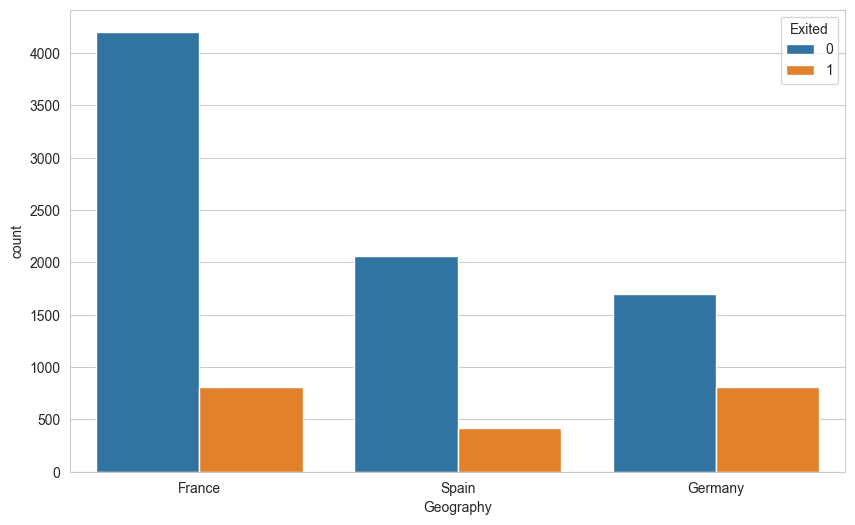

In [19]:
#So I'd like to see the relationship between the independent variable and the target here 
#As we observe, the majority of people from France were retained, followed by Spain and Germany.
sns.countplot(x='Geography', hue = 'Exited',data = df)

<Axes: xlabel='Gender', ylabel='count'>

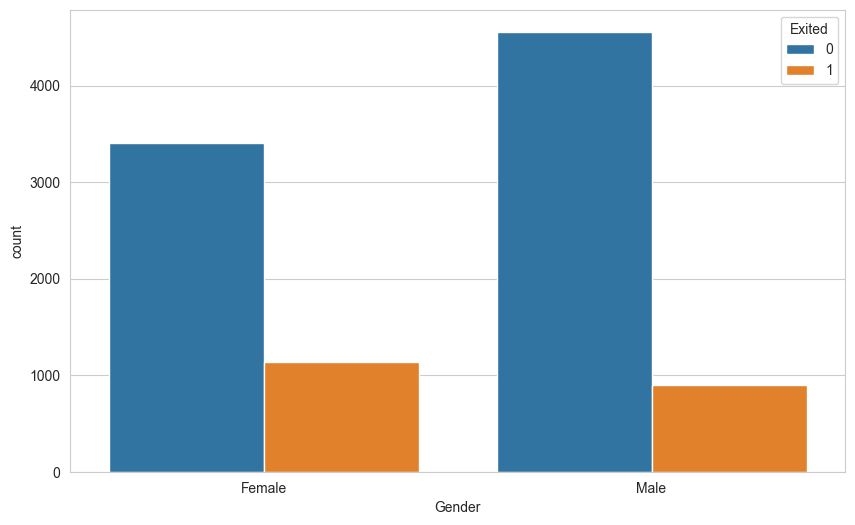

In [20]:
#As we observe, the majority of male people were retained, followed by female.
sns.countplot(x='Gender', hue = 'Exited',data = df)

<Axes: xlabel='HasCrCard', ylabel='count'>

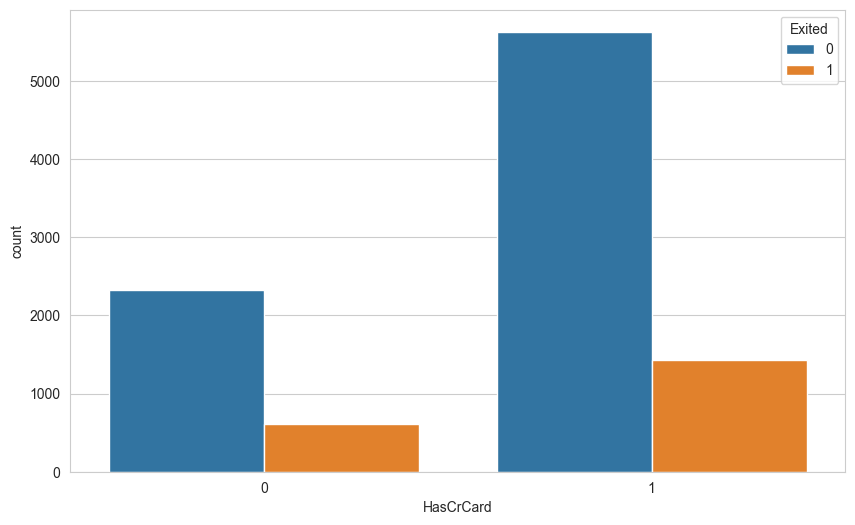

In [21]:
#As we observe,a significant number of credit cards given by banks to customers are mostly retained.
sns.countplot(x='HasCrCard', hue = 'Exited',data = df)

The number of credit cards given to the customer by the bank.

<Axes: xlabel='IsActiveMember', ylabel='count'>

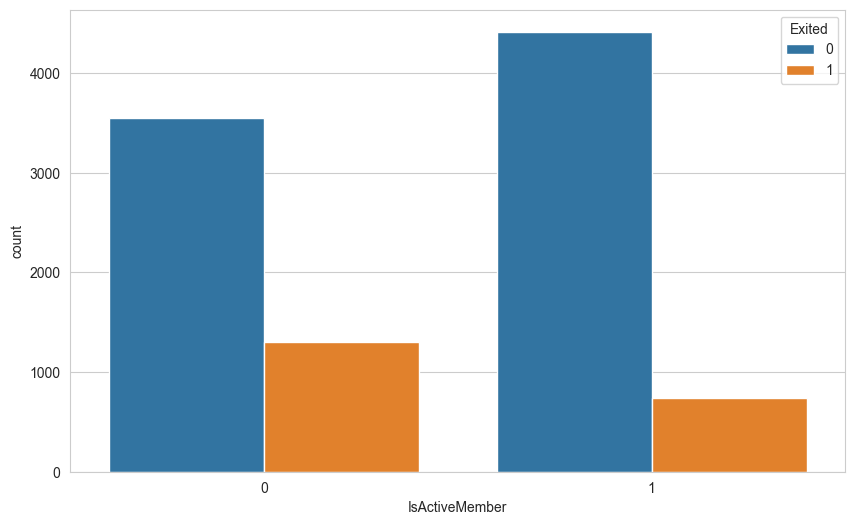

In [22]:
#the majority of clients are active in the bank, they are retained.
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

In [24]:
@interact(col=df.columns[1:], chart=["countplot", "histogram"])
def plot(col, chart):
    colors = np.random.choice(['blue', 'red', 'green'])
    if chart == "countplot":
        plt.figure(figsize=(20, 5))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + ' Countplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

    else:
        plt.figure(figsize=(20, 5))
        ax = sns.histplot(data=df, x=col, bins=80, kde=True, color=colors)
        plt.title(col + ' Histplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

interactive(children=(Dropdown(description='col', options=('Geography', 'Gender', 'Age', 'Tenure', 'Balance', …

In [25]:
#So here i will do OneHotEncoder to Geography and Gender columns
onehot = OneHotEncoder()
thecoulms = ['Geography', 'Gender']

In [26]:
onehot = OneHotEncoder(sparse=False)
trans = onehot.fit_transform(df[thecoulms])

In [27]:
arrayy = []
for i, column in enumerate(thecoulms):
    cat = onehot.categories_[i]
    arrayy.extend([column + '_' + str(catt) for catt in cat])

In [29]:
df.drop(thecoulms, axis=1, inplace=True)
df[arrayy] = trans

In [30]:
#Here is our data after running one hot encoder.
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1.000,0.000,0.000,1.000,0.000
1,608,41,1,83807.860,1,0,1,112542.580,0,0.000,0.000,1.000,1.000,0.000
2,502,42,8,159660.800,3,1,0,113931.570,1,1.000,0.000,0.000,1.000,0.000
3,699,39,1,0.000,2,0,0,93826.630,0,1.000,0.000,0.000,1.000,0.000
4,850,43,2,125510.820,1,1,1,79084.100,0,0.000,0.000,1.000,1.000,0.000


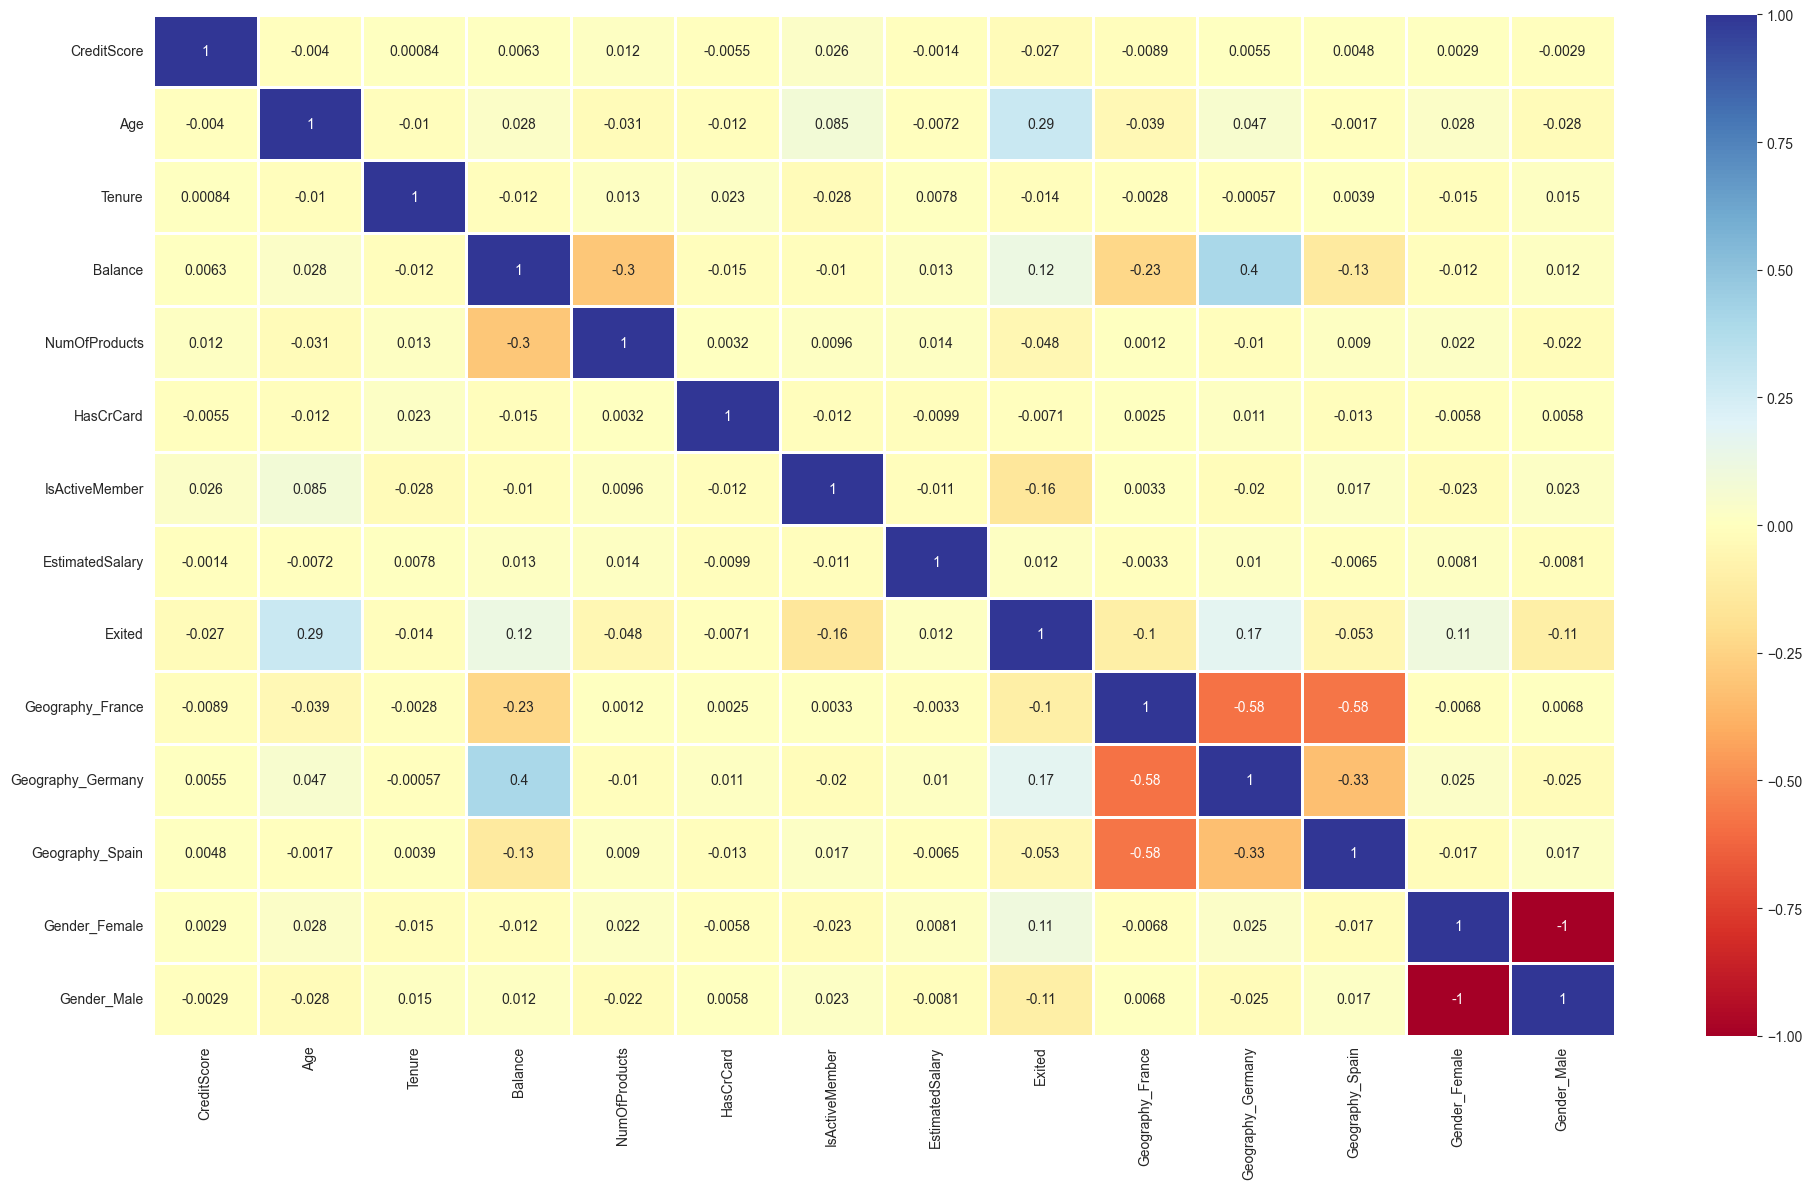

In [31]:
#In this case, we utilize the corr method to investigate the correlation of all columns.
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidth =2 , cmap="RdYlBu")
plt.tight_layout()

# Preprocessing of Data
- Train | Test Split, Scalling

In [32]:
#Here i create X and y as separate dataframes
X = df.drop("Exited", axis =1)
y = df["Exited"]

In [34]:
#Split dataset into testing sets and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
#So i used the Standard Scaler to help equalize the influence of all variables in this case. 
stscaler = StandardScaler()
X_train = stscaler.fit_transform(X_train)
X_test = stscaler.transform(X_test)

In [36]:
X_train.shape

(8000, 13)

In [37]:
X_test.shape

(2000, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [39]:
#I defined the number of seeds
seed = 42

In [40]:
tf.random.set_seed(seed)

My_Model = Sequential()# So here we initializing the ANN
My_Model.add(
    ## Here the first hidden layer
    Dense(units=21, activation="relu", input_dim=X_train.shape[1])#also behaves like the input layer as well, if provided with the input_dim parameter.
)  
My_Model.add(Dense(units=16, activation="relu")) # Adding Hidden Layer with activation relu
My_Model.add(Dense(units=6, activation="relu")) # Adding Hidden Layer with activation relu
My_Model.add(Dense(units=1, activation='sigmoid'))#So here in the Output Layer with activation sigmoid
#we add the Output layer with 1 neurons because we need one output, that is the customer will Closed or retained


In [41]:
#Print all summary 
My_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                294       
                                                                 
 dense_1 (Dense)             (None, 16)                352       
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 755 (2.95 KB)
Trainable params: 755 (2.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
My_Model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 21) dtype=float32, numpy=
 array([[-0.12183627,  0.15906242, -0.04109666, -0.16991517,  0.2745591 ,
         -0.01760849,  0.01438257,  0.38428363, -0.36459488, -0.32895914,
         -0.2163308 , -0.29862115, -0.30627665,  0.04044273, -0.076289  ,
          0.24142686,  0.1038743 ,  0.25487658,  0.20062366, -0.03937536,
          0.13475546],
        [ 0.00392812, -0.3216526 ,  0.12759784,  0.41916803, -0.15592751,
          0.07449752, -0.18854326, -0.16270447,  0.05901673,  0.11173263,
         -0.06121767,  0.3576031 ,  0.05318767,  0.32227263,  0.24548665,
         -0.27637452,  0.08902094, -0.0101614 , -0.23135428,  0.16954222,
         -0.01300302],
        [-0.28890902, -0.13537905,  0.37001732, -0.06495208,  0.05958432,
          0.40690324, -0.13568673, -0.01608303,  0.18878832,  0.20943889,
         -0.35202774,  0.2262921 ,  0.21931937, -0.2942309 , -0.2997676 ,
         -0.03982967,  0.391022  , -0.24398112,  0.29408136,  0.14586976

In [43]:
# So we build our model here by selecting Adam as the optimizer method and loss fun as the binary
# and Because we have inconsistent data, as shown in the graph, we will focus on recall.
My_Model.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [44]:
# We build model with epochs size 250 and batch size 32 without class weight
My_Model.fit(x=X_train,y=y_train,validation_split=0.1 ,batch_size = 32, epochs = 250, verbose=1)

Epoch 1/250
225/225 [==============================] - 1s 2ms/step - loss: 0.4922 - recall: 0.0054 - val_loss: 0.4392 - val_recall: 0.0671
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4279 - recall: 0.1185 - val_loss: 0.4083 - val_recall: 0.2012
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - recall: 0.2684 - val_loss: 0.3776 - val_recall: 0.2683
Epoch 4/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3763 - recall: 0.3733 - val_loss: 0.3494 - val_recall: 0.4512
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3587 - recall: 0.4264 - val_loss: 0.3360 - val_recall: 0.4878
Epoch 6/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3503 - recall: 0.4557 - val_loss: 0.3289 - val_recall: 0.4817
Epoch 7/250
225/225 [==============================] - 0s 1ms/step - loss: 0.3453 - recall: 0.4550 - val_loss: 0.3236 - val_recall: 0.5000
Epoch 8/250
225/225 [======

In [45]:
My_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                294       
                                                                 
 dense_1 (Dense)             (None, 16)                352       
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 755 (2.95 KB)
Trainable params: 755 (2.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
My_Model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 21) dtype=float32, numpy=
 array([[-0.56282246, -0.15607718, -0.49492013, -0.03055876, -0.19250305,
         -0.57061714,  0.01466676,  0.09216522, -0.64882725, -0.14765848,
         -0.06263327, -0.2617683 , -0.09887133,  0.02270549,  0.04529848,
         -0.01820745,  0.21544768, -0.02887285,  0.02178586, -0.22163185,
          0.27603954],
        [-0.22242579, -0.09805466, -0.35490677,  1.5227057 , -0.6569804 ,
         -0.66741693, -0.75946474, -0.09661333, -0.4527152 ,  0.14641458,
          0.08982852,  0.06078064,  0.58549917,  0.43960804,  0.23492008,
         -0.8922691 ,  0.12808536, -0.16534834, -0.09827068,  0.84570575,
         -0.34806252],
        [-0.3211843 ,  0.11825485,  0.8365701 , -0.21637213,  0.07371327,
          1.0850044 , -0.43244419,  0.39122245, -0.15591347,  0.5387064 ,
         -0.47747722,  0.11513045,  0.28980342, -0.3975374 , -0.35255715,
         -0.2318902 ,  0.34133086, -0.00510942, -0.0745869 , -0.1575594 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [47]:
My_Model.history.history

{'loss': [0.49224305152893066,
  0.4279148280620575,
  0.401323527097702,
  0.3762668967247009,
  0.35873356461524963,
  0.3503013849258423,
  0.34533318877220154,
  0.3405453860759735,
  0.3387601971626282,
  0.33586904406547546,
  0.3346681594848633,
  0.333635151386261,
  0.33195018768310547,
  0.33016237616539,
  0.3298797905445099,
  0.3286975026130676,
  0.32709670066833496,
  0.3263873755931854,
  0.3261902630329132,
  0.32501980662345886,
  0.3242863714694977,
  0.3240804374217987,
  0.3233465850353241,
  0.3227308392524719,
  0.3223731219768524,
  0.3212908208370209,
  0.32143011689186096,
  0.32052361965179443,
  0.32060274481773376,
  0.31922394037246704,
  0.3205656409263611,
  0.31829288601875305,
  0.31809964776039124,
  0.31730759143829346,
  0.3175629675388336,
  0.3169582486152649,
  0.3169543743133545,
  0.3161294162273407,
  0.31556236743927,
  0.31453973054885864,
  0.3158901035785675,
  0.3145444095134735,
  0.314651221036911,
  0.314509779214859,
  0.3141010403633

In [48]:
loss_df = pd.DataFrame(My_Model.history.history)
loss_df.head()


,loss,recall,val_loss,val_recall
0,0.492,0.005,0.439,0.067
1,0.428,0.119,0.408,0.201
2,0.401,0.268,0.378,0.268
3,0.376,0.373,0.349,0.451
4,0.359,0.426,0.336,0.488


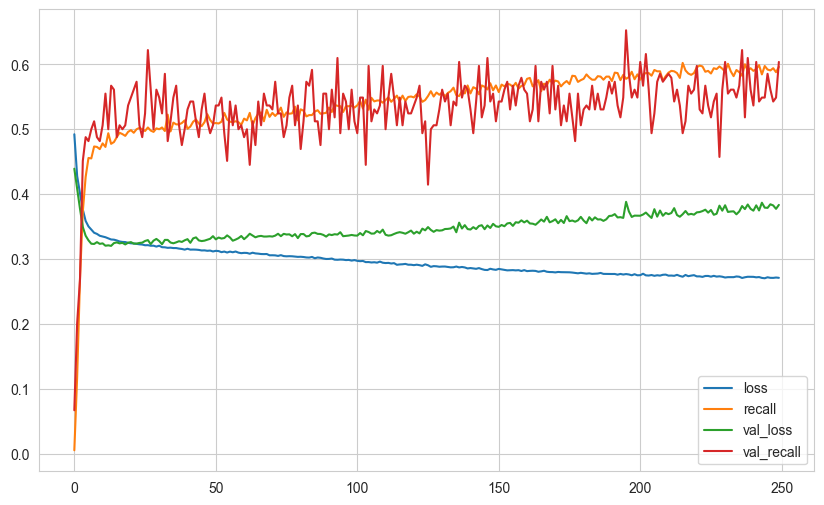

In [49]:
#Here we plot our model, and as we can see, it is training well but might be improved.
loss_df.plot()
plt.show()

In [179]:
loss, recall = My_Model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.39459723234176636
recall:  0.5407407283782959


In [51]:
y_pred = My_Model.predict(X_test)

63/63 [==============================] - 0s 747us/step


In [52]:
y_pred= (My_Model.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 757us/step


In [53]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
comp = pd.DataFrame(my_dict)
comp.sample(20)

,Actual,Pred
4234,0,0
9137,0,0
2915,1,1
2363,0,0
5206,0,0
1257,0,0
6378,1,0
1819,0,0
7626,0,0
3841,1,1


In [54]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[1464  131]
 [ 186  219]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1595
           1       0.63      0.54      0.58       405

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.83      0.84      0.84      2000



In [56]:
accuracy_score(y_test, y_pred)

0.8415

###The model scores an accuracy of test 84%

In [57]:
x_pred = My_Model.predict(X_train)

250/250 [==============================] - 0s 715us/step


In [58]:
x_pred= (My_Model.predict(X_train) > 0.5).astype("int32")

250/250 [==============================] - 0s 723us/step


In [59]:
print(confusion_matrix(y_train , x_pred))
print(classification_report(y_train,x_pred))

[[6073  295]
 [ 580 1052]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6368
           1       0.78      0.64      0.71      1632

    accuracy                           0.89      8000
   macro avg       0.85      0.80      0.82      8000
weighted avg       0.89      0.89      0.89      8000



In [60]:
accuracy_score(y_train, x_pred)

0.890625

###The model scores an accuracy of 89%

In [61]:
roc_auc_score(y_test, y_pred)

0.7293045396493674

In [63]:
def roc_auc_plot(y_train, ptrain, y_test, ptest):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, ptrain)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, ptest)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

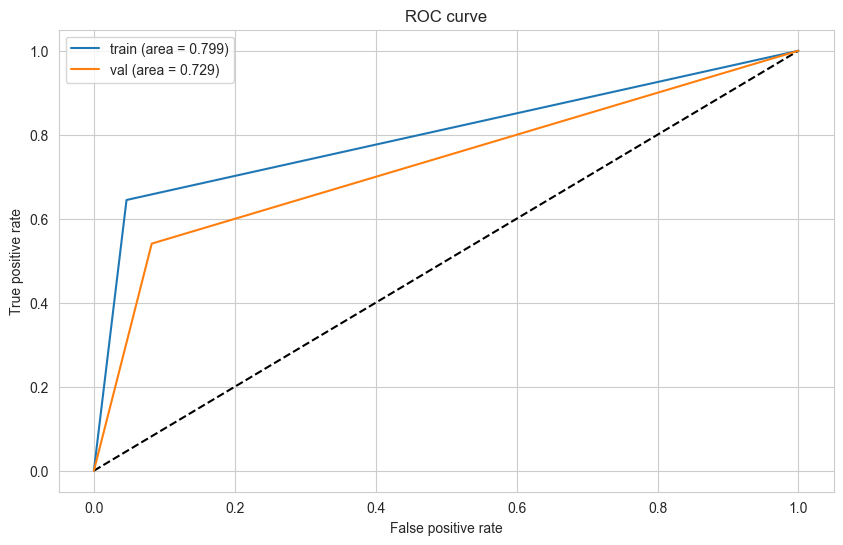

In [64]:
roc_auc_plot(y_train, x_pred,y_test, y_pred)

In [65]:
from sklearn.metrics import RocCurveDisplay

63/63 [==============================] - 0s 789us/step


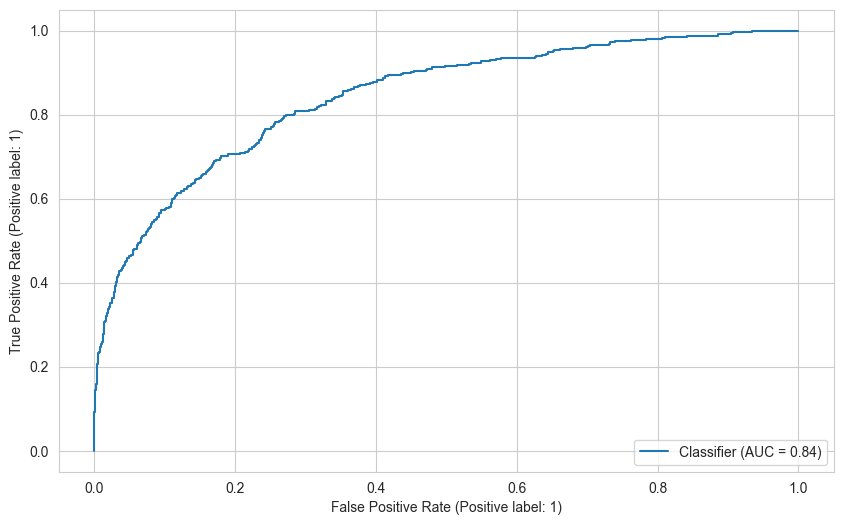

In [66]:
y_pred = My_Model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [67]:
#Here we compute class weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [68]:
#print class weight for class 0 and 1
class_weights

{0: 0.628140703517588, 1: 2.450980392156863}

In [69]:
tf.random.set_seed(seed)
My_Model_with = Sequential()# So here we initializing the ANN

My_Model_with.add(
    ### Here the first hidden layer
    Dense(units=21, activation="relu", input_dim=X_train.shape[1])# also behaves like the input layer as well, if provided with the input_dim parameter.
)  # Here the first hidden layer
My_Model_with.add(Dense(units=16, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_with.add(Dense(units=6, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_with.add(Dense(units=1, activation='sigmoid')))#So here in the Output Layer with activation sigmoid
#we add the Output layer with 1 neurons because we need one output, that is the customer will Closed or retained


In [70]:
# So we build our model here by selecting Adam as the optimizer method and loss fun as the binary
# and Because we have inconsistent data, as shown in the graph, we will focus on recall.
My_Model_with.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [71]:
# We build model with epochs size 250 and batch size 32 with class weight
My_Model_with.fit(x=X_train,y=y_train,validation_split=0.1 ,batch_size = 32, epochs = 250, verbose=1,class_weight=class_weights)

Epoch 1/250
225/225 [==============================] - 1s 2ms/step - loss: 0.6483 - recall: 0.5593 - val_loss: 0.5900 - val_recall: 0.7073
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5841 - recall: 0.7044 - val_loss: 0.5363 - val_recall: 0.7134
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5588 - recall: 0.7159 - val_loss: 0.5142 - val_recall: 0.7134
Epoch 4/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5398 - recall: 0.7262 - val_loss: 0.5178 - val_recall: 0.7378
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5178 - recall: 0.7425 - val_loss: 0.5051 - val_recall: 0.7622
Epoch 6/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4969 - recall: 0.7473 - val_loss: 0.4785 - val_recall: 0.7744
Epoch 7/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4814 - recall: 0.7486 - val_loss: 0.4666 - val_recall: 0.7683
Epoch 8/250
225/225 [======

In [72]:
My_Model_with.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 21)                294       
                                                                 
 dense_5 (Dense)             (None, 16)                352       
                                                                 
 dense_6 (Dense)             (None, 6)                 102       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 755 (2.95 KB)
Trainable params: 755 (2.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
My_Model_with.weights

[<tf.Variable 'dense_4/kernel:0' shape=(13, 21) dtype=float32, numpy=
 array([[ 0.13535097,  0.15489267, -0.3768985 ,  0.22751401,  0.36029777,
         -0.28931373, -0.6015033 , -0.10256563,  0.3467541 ,  0.36476758,
          0.37985963,  0.34754455, -0.04675533, -0.1974524 , -0.27422106,
         -0.3306188 , -0.15873072,  0.7344483 , -0.36253643, -0.78864527,
          0.05048987],
        [-0.8412089 ,  0.43991274,  0.06326879,  0.20412588, -1.1799151 ,
          0.07007445, -0.7307415 ,  1.2052195 ,  0.02435521, -0.3256421 ,
          0.25511217,  0.460588  , -0.35237858, -0.4426906 ,  0.14073308,
          0.13147363,  0.8294446 ,  0.6188163 , -0.16172306, -0.13441925,
          0.03102269],
        [-0.6442    , -0.30905533, -0.09300555,  0.03863516, -0.34184864,
         -0.74387646, -0.11884162, -0.205766  ,  0.7084814 ,  0.4352433 ,
         -0.51918894, -1.003831  ,  0.6714419 , -0.39108872,  0.2785192 ,
          0.5339557 ,  0.30678636, -0.27392203, -0.6334258 ,  0.103659

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [74]:
My_Model_with.history.history

{'loss': [0.648338258266449,
  0.584088146686554,
  0.5588386058807373,
  0.5397886037826538,
  0.5178107023239136,
  0.49693095684051514,
  0.4813968241214752,
  0.47140470147132874,
  0.4665317237377167,
  0.4610776901245117,
  0.4593292474746704,
  0.4571061134338379,
  0.4560725688934326,
  0.4528373181819916,
  0.4519710838794708,
  0.4498854875564575,
  0.44678792357444763,
  0.44633588194847107,
  0.4443228542804718,
  0.44379618763923645,
  0.44203266501426697,
  0.4422633945941925,
  0.4401117265224457,
  0.4396572411060333,
  0.4374309182167053,
  0.43674588203430176,
  0.43703776597976685,
  0.4347398579120636,
  0.4354960322380066,
  0.4333026111125946,
  0.4341125190258026,
  0.43236616253852844,
  0.4322630763053894,
  0.43113046884536743,
  0.43091049790382385,
  0.4289850890636444,
  0.42900681495666504,
  0.428280770778656,
  0.427788108587265,
  0.42521700263023376,
  0.4260241389274597,
  0.4243244230747223,
  0.42460671067237854,
  0.42450276017189026,
  0.423827320

In [75]:
loss_w = pd.DataFrame(My_Model_with.history.history)
loss_w.head()


,loss,recall,val_loss,val_recall
0,0.648,0.559,0.590,0.707
1,0.584,0.704,0.536,0.713
2,0.559,0.716,0.514,0.713
3,0.540,0.726,0.518,0.738
4,0.518,0.743,0.505,0.762


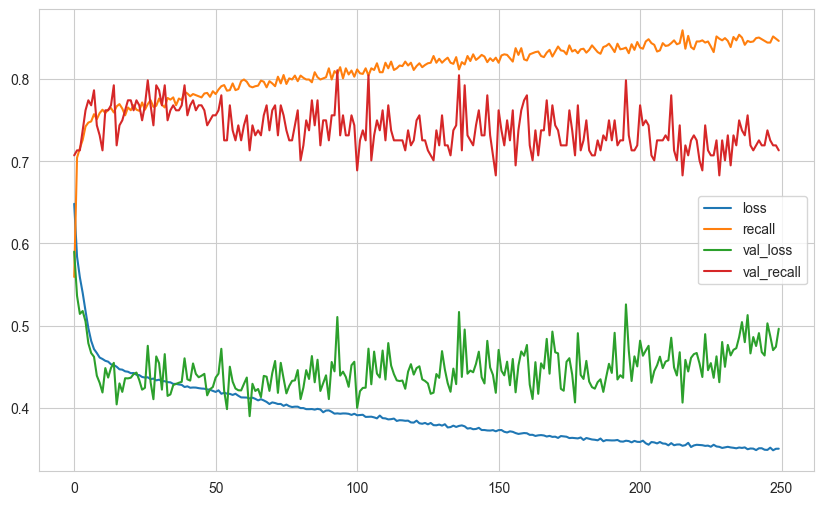

In [76]:
#As we can see in this plot, there is a significant difference between the current model and the previous model. 
loss_w.plot()
plt.show()

In [ ]:
# ev_with = My_Model_with.evaluate(X_test, y_test, verbose=0)

In [178]:
loss, recall = My_Model_with.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5594959259033203
recall:  0.7629629373550415


In [78]:
y_pred_with = My_Model_with.predict(X_test)

63/63 [==============================] - 0s 737us/step


In [79]:
y_pred_with= (My_Model_with.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 736us/step


In [80]:
print(confusion_matrix(y_test, y_pred_with))
print(classification_report(y_test,y_pred_with))

[[1191  404]
 [  96  309]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1595
           1       0.43      0.76      0.55       405

    accuracy                           0.75      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.83      0.75      0.77      2000



In [81]:
roc_auc_score(y_test, y_pred_with)

0.7548357134564031

In [82]:
x_pred_with = My_Model_with.predict(X_train)

250/250 [==============================] - 0s 707us/step


In [83]:
x_pred_with= (My_Model_with.predict(X_train) > 0.5).astype("int32")

250/250 [==============================] - 0s 811us/step


In [84]:
print(confusion_matrix(y_train , x_pred_with))
print(classification_report(y_train,x_pred_with))

[[5108 1260]
 [ 204 1428]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      6368
           1       0.53      0.88      0.66      1632

    accuracy                           0.82      8000
   macro avg       0.75      0.84      0.77      8000
weighted avg       0.87      0.82      0.83      8000



In [86]:
roc_auc_score(y_test, y_pred_with)

0.7548357134564031

In [87]:
def roc_auc_plot(y_train, ptrain, y_test, ptest):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, ptrain)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, ptest)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

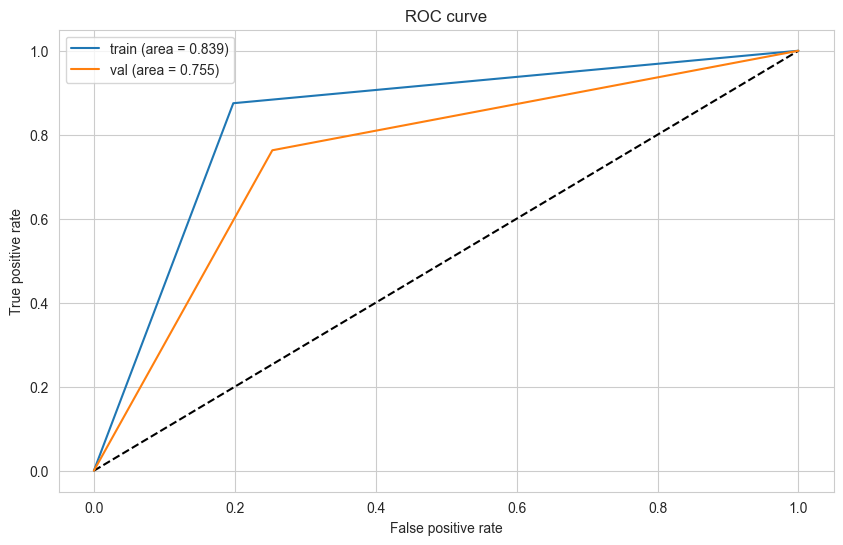

In [88]:
roc_auc_plot(y_train, x_pred_with,y_test, y_pred_with)

63/63 [==============================] - 0s 738us/step


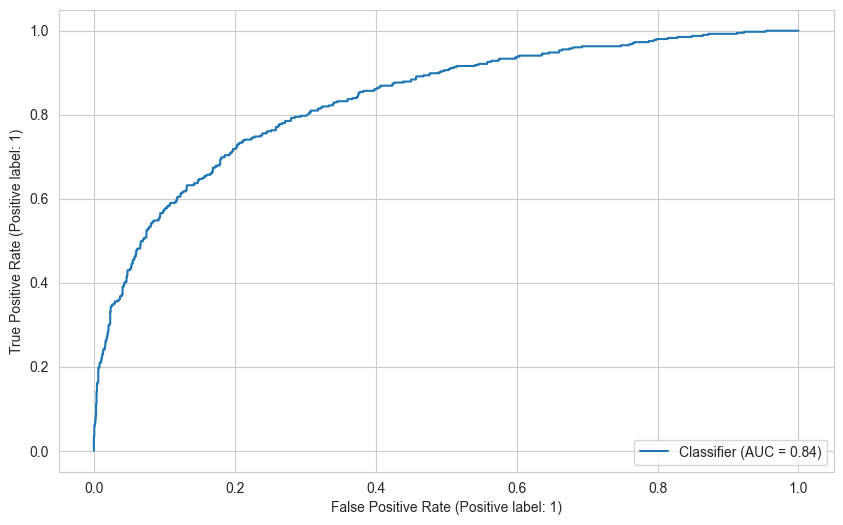

In [89]:
y_pred_with = My_Model_with.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_with)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [90]:

tf.random.set_seed(seed)
My_Model_withLR = Sequential()# So here we initializing the ANN
My_Model_withLR.add(
    Dense(units=21, activation="relu", input_dim=X_train.shape[1])# also behaves like the input layer as well, if provided with the input_dim parameter.
)  # Here the first hidden layer
My_Model_withLR.add(Dense(units=16, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_withLR.add(Dense(units=6, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_withLR.add(Dense(units=1, activation='sigmoid'))#So here in the Output Layer with activation sigmoid
#we add the Output layer with 1 neurons because we need one output, that is the customer will Closed or retained


In [91]:
# So we build our model here by selecting learning rate=0.01 and Adam as the optimizer method and loss fun as the binary
# and Because we have inconsistent data, as shown in the graph, we will focus on recall.
opt = Adam(learning_rate=0.01)
My_Model_withLR.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [92]:
# We build model with epochs size 250 and batch size 32 with class weight
My_Model_withLR.fit(x=X_train,y=y_train,validation_split=0.1 ,batch_size = 32, epochs = 250, verbose=1,class_weight=class_weights)

Epoch 1/250
225/225 [==============================] - 1s 2ms/step - loss: 0.5579 - recall: 0.7153 - val_loss: 0.4749 - val_recall: 0.7317
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4910 - recall: 0.7221 - val_loss: 0.4756 - val_recall: 0.7805
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4836 - recall: 0.7350 - val_loss: 0.4401 - val_recall: 0.7683
Epoch 4/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4731 - recall: 0.7575 - val_loss: 0.4313 - val_recall: 0.7317
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4678 - recall: 0.7575 - val_loss: 0.4350 - val_recall: 0.7744
Epoch 6/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4658 - recall: 0.7677 - val_loss: 0.4178 - val_recall: 0.7439
Epoch 7/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4609 - recall: 0.7582 - val_loss: 0.4959 - val_recall: 0.8049
Epoch 8/250
225/225 [======

In [93]:
My_Model_withLR.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 21)                294       
                                                                 
 dense_9 (Dense)             (None, 16)                352       
                                                                 
 dense_10 (Dense)            (None, 6)                 102       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 755 (2.95 KB)
Trainable params: 755 (2.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
My_Model_withLR.weights

[<tf.Variable 'dense_8/kernel:0' shape=(13, 21) dtype=float32, numpy=
 array([[-3.67051661e-01,  8.19355071e-01, -2.48616338e+00,
         -7.44483888e-01, -1.60792124e+00, -2.15049076e+00,
         -2.64787531e+00,  4.33025980e+00,  1.46100247e+00,
          7.17876375e-01,  1.35504946e-01,  1.37109339e+00,
         -3.55527472e+00,  1.95641482e+00, -4.09516239e+00,
         -1.42555952e+00,  2.49785495e+00, -1.42680073e+00,
          6.29254103e-01, -2.31510162e-01,  2.99031138e-02],
        [-9.79643345e-01,  5.75589752e+00,  1.70950198e+00,
         -2.79599190e+00, -2.49039650e+00,  2.23617053e+00,
         -4.93928528e+00, -8.95746112e-01, -3.26357865e+00,
          4.28246260e+00,  1.66270983e+00, -2.60601997e+00,
          1.03642917e+00, -4.98696852e+00, -1.49003133e-01,
          1.05093944e+00,  2.24982619e+00, -1.83260465e+00,
         -5.09795094e+00,  4.70828676e+00, -4.81061316e+00],
        [-1.63276233e-02,  7.04421461e-01,  1.74037725e-01,
         -1.62718153e+00, -6

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [95]:
My_Model_withLR.history.history

{'loss': [0.5579019784927368,
  0.49104776978492737,
  0.483561635017395,
  0.4731420874595642,
  0.46780744194984436,
  0.4657772183418274,
  0.4609168767929077,
  0.45906972885131836,
  0.45831218361854553,
  0.456585556268692,
  0.4546802043914795,
  0.452358216047287,
  0.44674432277679443,
  0.44806554913520813,
  0.4485894739627838,
  0.44305524230003357,
  0.4403967261314392,
  0.4422287344932556,
  0.43874290585517883,
  0.43783894181251526,
  0.4361083209514618,
  0.4364740550518036,
  0.43359217047691345,
  0.43115872144699097,
  0.42830920219421387,
  0.43042075634002686,
  0.4265560805797577,
  0.42802694439888,
  0.4228900969028473,
  0.41914111375808716,
  0.4256623685359955,
  0.4231053590774536,
  0.4226507842540741,
  0.4218233823776245,
  0.4144252836704254,
  0.41892972588539124,
  0.41521111130714417,
  0.412315309047699,
  0.411517471075058,
  0.4111728370189667,
  0.4107101559638977,
  0.4118863344192505,
  0.4046483337879181,
  0.4095219671726227,
  0.40522035956

In [96]:
loss_LR = pd.DataFrame(My_Model_withLR.history.history)
loss_LR.head()

,loss,recall,val_loss,val_recall
0,0.558,0.715,0.475,0.732
1,0.491,0.722,0.476,0.780
2,0.484,0.735,0.440,0.768
3,0.473,0.757,0.431,0.732
4,0.468,0.757,0.435,0.774


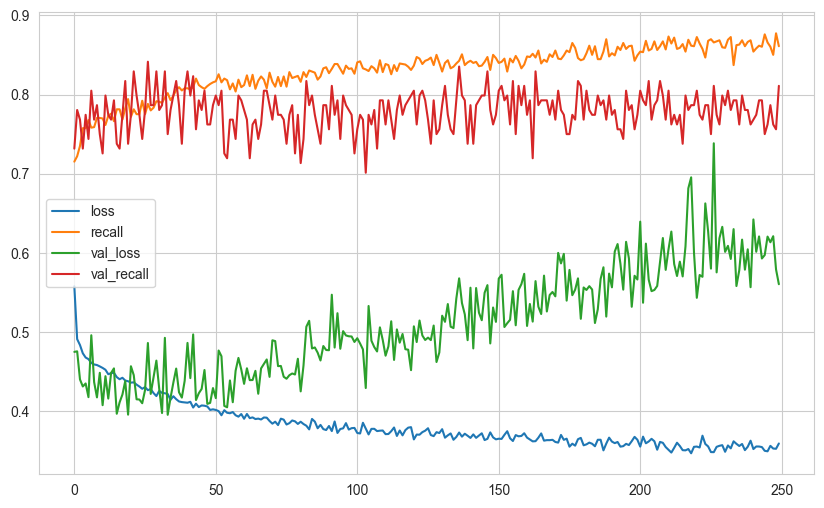

In [97]:
#As we can see in this plot,there is a strongly overfitting here with learning_rate=0.01
loss_LR.plot()
plt.show()

In [177]:
loss, recall = My_Model_withLR.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.6288143992424011
recall:  0.7950617074966431


In [99]:
y_pred_withRL = My_Model_withLR.predict(X_test)

63/63 [==============================] - 0s 724us/step


In [100]:
y_pred_withRL= (My_Model_withLR.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 712us/step


In [101]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred_withRL))
print(classification_report(y_test,y_pred_withRL))

[[1134  461]
 [  83  322]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1595
           1       0.41      0.80      0.54       405

    accuracy                           0.73      2000
   macro avg       0.67      0.75      0.67      2000
weighted avg       0.83      0.73      0.75      2000



In [102]:
x_pred_withLR = My_Model_withLR.predict(X_train)

250/250 [==============================] - 0s 717us/step


In [103]:
x_pred_withLR= (My_Model_withLR.predict(X_train) > 0.5).astype("int32")

250/250 [==============================] - 0s 766us/step


In [104]:
print(confusion_matrix(y_train , x_pred_withLR))
print(classification_report(y_train,x_pred_withLR))

[[4928 1440]
 [ 187 1445]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      6368
           1       0.50      0.89      0.64      1632

    accuracy                           0.80      8000
   macro avg       0.73      0.83      0.75      8000
weighted avg       0.87      0.80      0.81      8000



In [105]:
roc_auc_score(y_test, y_pred_withRL)

0.7530167576144589

In [106]:
def roc_auc_plot(y_train, ptrain, y_test, ptest):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, ptrain)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, ptest)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

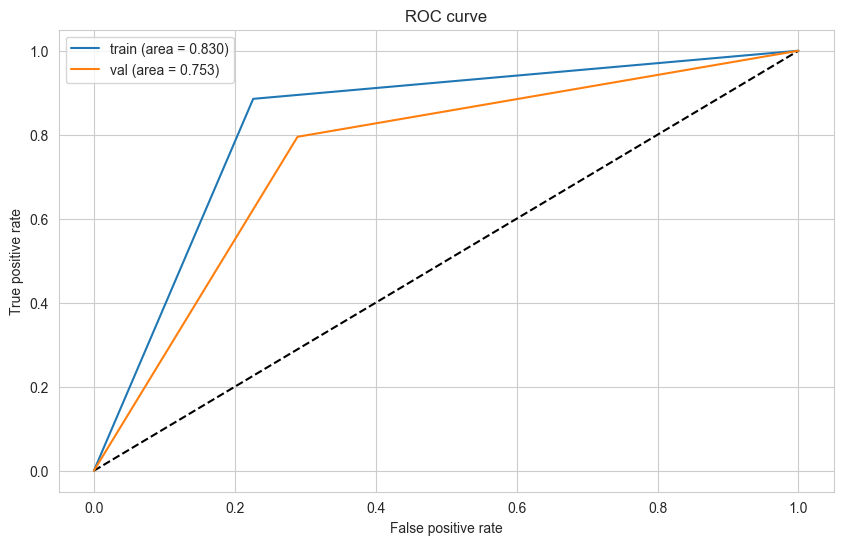

In [107]:
roc_auc_plot(y_train, x_pred_withLR,y_test, y_pred_withRL)

63/63 [==============================] - 0s 739us/step


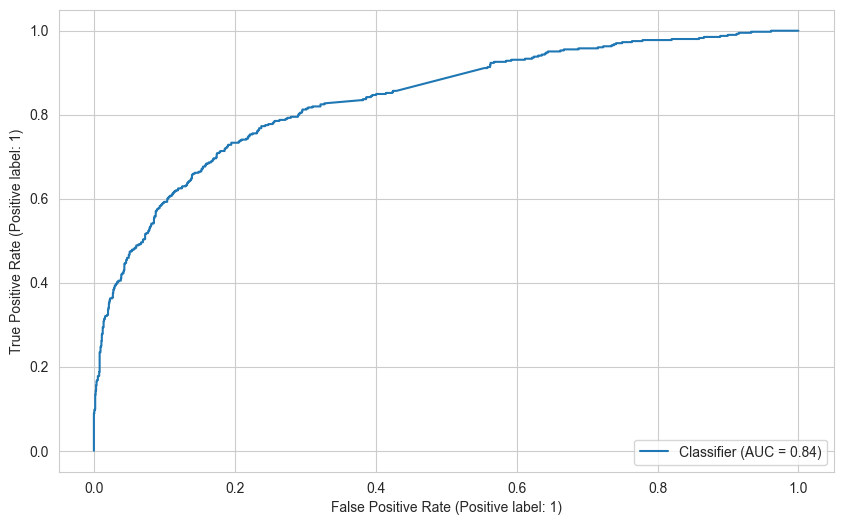

In [108]:
y_pred_withRL = My_Model_withLR.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_withRL)

### Add Dropout Layer

In [110]:
tf.random.set_seed(seed)
My_Model_withDO = Sequential()# So here we initializing the ANN

My_Model_withDO.add(Dense(21, activation="relu", input_dim=X_train.shape[1]))
My_Model_withDO.add(Dropout(0.3))

My_Model_withDO.add(Dense(16, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_withDO.add(Dropout(0.3)) # Adding Dropout with 0.3

My_Model_withDO.add(Dense(6, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_withDO.add(Dropout(0.3))# Adding Dropout with 0.3

My_Model_withDO.add(Dense(1, activation="sigmoid"))#So here in the Output Layer with activation sigmoid
#we add the Output layer with 1 neurons because we need one output, that is the customer will Closed or retained



In [111]:
# So we build our model here by selecting learning rate=0.01 and Adam as the optimizer method and loss fun as the binary
# and Because we have inconsistent data, as shown in the graph, we will focus on recall.
opt = Adam(learning_rate=0.001)
My_Model_withDO.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [112]:
# We build model with epochs size 250 and batch size 32 with class weight
My_Model_withDO.fit(x=X_train,y=y_train,validation_split=0.1 ,batch_size = 32, epochs = 250, verbose=1,class_weight=class_weights)

Epoch 1/250
225/225 [==============================] - 1s 2ms/step - loss: 0.7002 - recall: 0.6144 - val_loss: 0.6802 - val_recall: 0.8171
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6553 - recall: 0.6417 - val_loss: 0.6204 - val_recall: 0.7195
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6364 - recall: 0.6206 - val_loss: 0.5955 - val_recall: 0.7500
Epoch 4/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6168 - recall: 0.6356 - val_loss: 0.5511 - val_recall: 0.7256
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6131 - recall: 0.6219 - val_loss: 0.5464 - val_recall: 0.7561
Epoch 6/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5972 - recall: 0.6396 - val_loss: 0.5321 - val_recall: 0.7561
Epoch 7/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5855 - recall: 0.6485 - val_loss: 0.5111 - val_recall: 0.7683
Epoch 8/250
225/225 [======

In [113]:
My_Model_withDO.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 21)                294       
                                                                 
 dropout (Dropout)           (None, 21)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                352       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 6)                 102       
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [114]:
My_Model_withDO.weights

[<tf.Variable 'dense_12/kernel:0' shape=(13, 21) dtype=float32, numpy=
 array([[-2.32824773e-01,  3.47520271e-03,  3.51602770e-02,
         -6.25063032e-02, -6.73802570e-02,  1.34896459e-02,
          3.19880486e-01, -1.02905445e-01, -1.26118124e-01,
         -6.07625507e-02,  1.33185722e-02,  2.86648795e-02,
         -6.53414503e-02,  4.29451689e-02, -1.36381924e-01,
         -7.57092461e-02, -7.67528340e-02, -9.99154747e-02,
          5.59223481e-02, -4.77892458e-02, -2.28831302e-02],
        [-9.18129563e-01,  5.14760554e-01,  3.38582933e-01,
          3.13631415e-01,  2.01916233e-01,  6.87473714e-02,
         -8.26604605e-01, -7.13404775e-01, -4.79544438e-02,
          1.01092480e-01,  6.56389832e-01, -2.99413204e-01,
          2.88986713e-01, -1.04190075e+00,  1.82987526e-01,
         -1.01290214e+00,  6.26316294e-02,  1.49219766e-01,
          2.31198147e-01,  2.17104122e-01,  4.99549061e-01],
        [-1.28831342e-01, -1.38022497e-01,  4.25133593e-02,
         -2.03899294e-01, -

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [115]:
My_Model_withDO.history.history

{'loss': [0.7002176642417908,
  0.655291736125946,
  0.636448085308075,
  0.6168469190597534,
  0.6131485104560852,
  0.5971733927726746,
  0.5855046510696411,
  0.5862328410148621,
  0.5779806971549988,
  0.5710145831108093,
  0.5611352324485779,
  0.5523552298545837,
  0.547088086605072,
  0.5432959794998169,
  0.539478600025177,
  0.5358686447143555,
  0.5482105612754822,
  0.5338841080665588,
  0.5293809771537781,
  0.5215784907341003,
  0.5351468920707703,
  0.5224639773368835,
  0.5138104557991028,
  0.5159128904342651,
  0.5233102440834045,
  0.5224630236625671,
  0.5056393146514893,
  0.5155080556869507,
  0.5203432440757751,
  0.5146071910858154,
  0.5083120465278625,
  0.5047061443328857,
  0.5077072978019714,
  0.5000745058059692,
  0.5081518292427063,
  0.5107578635215759,
  0.5045070648193359,
  0.5060449838638306,
  0.5000569820404053,
  0.5046089887619019,
  0.5117946267127991,
  0.503278374671936,
  0.5049161911010742,
  0.5023415684700012,
  0.5019654631614685,
  0.501

In [116]:
loss_DO = pd.DataFrame(My_Model_withDO.history.history)
loss_DO.head()

,loss,recall,val_loss,val_recall
0,0.700,0.614,0.680,0.817
1,0.655,0.642,0.620,0.720
2,0.636,0.621,0.595,0.750
3,0.617,0.636,0.551,0.726
4,0.613,0.622,0.546,0.756


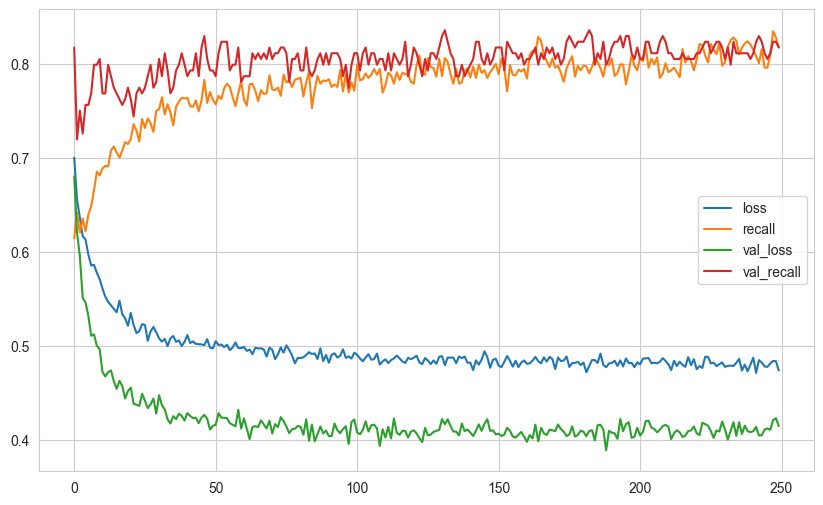

In [117]:
#As shown in this plot, there has been improved slightly with drop out
loss_DO.plot()
plt.show()

In [176]:
loss, recall = My_Model_withDO.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4628736972808838
recall:  0.8345679044723511


In [119]:
y_pred_withDO = My_Model_withDO.predict(X_test)

63/63 [==============================] - 0s 851us/step


In [120]:
y_pred_withDO= (My_Model_withDO.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 716us/step


In [121]:
print(confusion_matrix(y_test, y_pred_withDO))
print(classification_report(y_test,y_pred_withDO))

[[1141  454]
 [  67  338]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.81      1595
           1       0.43      0.83      0.56       405

    accuracy                           0.74      2000
   macro avg       0.69      0.77      0.69      2000
weighted avg       0.84      0.74      0.76      2000



In [122]:
x_pred_withDO= My_Model_withDO.predict(X_train)

250/250 [==============================] - 0s 704us/step


In [123]:
x_pred_withDO= (My_Model_withDO.predict(X_train) > 0.5).astype("int32")

250/250 [==============================] - 0s 679us/step


In [124]:
print(confusion_matrix(y_train , x_pred_withDO))
print(classification_report(y_train,x_pred_withDO))

[[4774 1594]
 [ 283 1349]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      6368
           1       0.46      0.83      0.59      1632

    accuracy                           0.77      8000
   macro avg       0.70      0.79      0.71      8000
weighted avg       0.84      0.77      0.79      8000



In [125]:
y_pred_withDO = My_Model_withDO.predict(X_test)

63/63 [==============================] - 0s 771us/step


In [126]:
roc_auc_score(y_test, y_pred_withDO)

0.8629436123688997

In [127]:
def roc_auc_plot(y_train, ptrain, y_test, ptest):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, ptrain)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, ptest)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

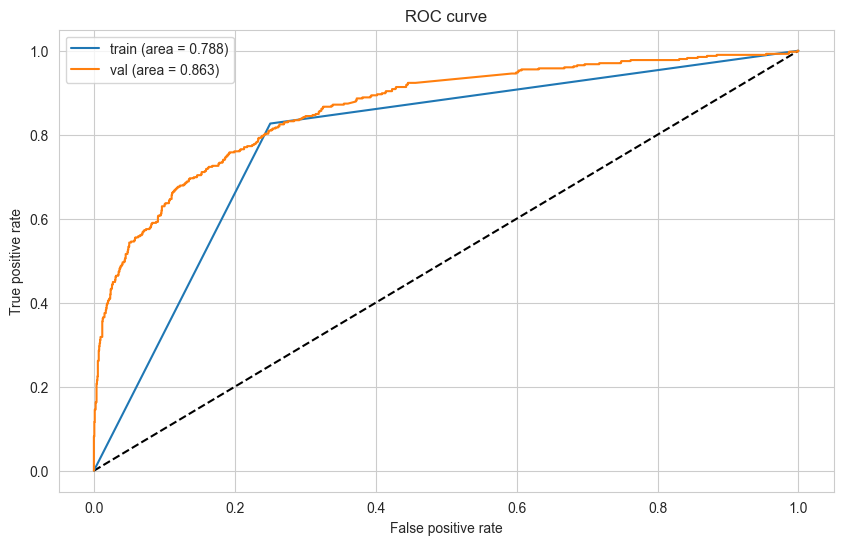

In [128]:
roc_auc_plot(y_train, x_pred_withDO,y_test, y_pred_withDO)

63/63 [==============================] - 0s 767us/step


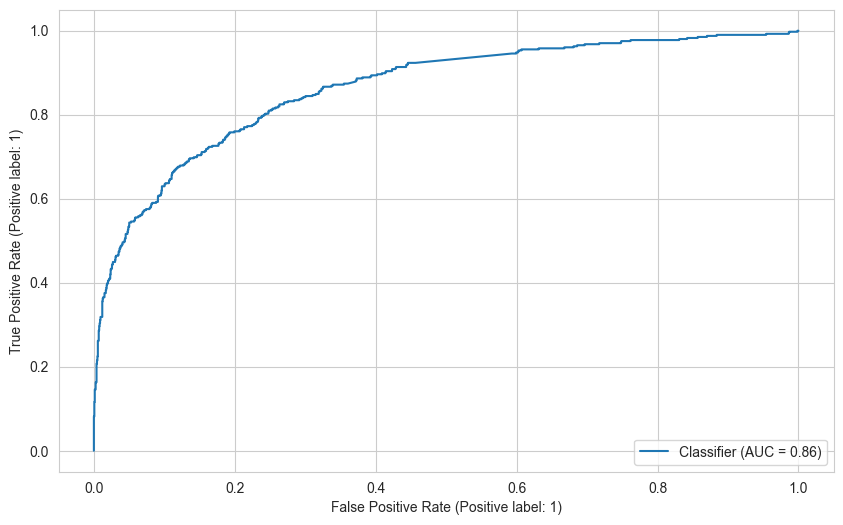

In [129]:
y_pred_withDO = My_Model_withDO.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_withDO)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [131]:
tf.random.set_seed(seed)
My_Model_withES = Sequential()# So here we initializing the ANN

My_Model_withES.add(
    Dense(units=21, activation="relu", input_dim=X_train.shape[1])
)  # Here the first hidden layer
# also behaves like the input layer as well, if provided with the input_dim parameter.
My_Model_withES.add(Dense(units=16, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_withES.add(Dense(units=6, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_withES.add(Dense(units=1, activation='sigmoid'))#So here in the Output Layer with activation sigmoid
#we add the Output layer with 1 neurons because we need one output, that is the customer will Closed or retained

In [132]:
My_Model_withES.compile(optimizer='Adam', loss="binary_crossentropy", metrics=["Recall"])

In [133]:
# so here we add early stop we will monitor val_loss 
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [134]:
# We build model with epochs size 250 and batch size 32 with class weight
My_Model_withES.fit(x=X_train,y=y_train,validation_split=0.1 ,batch_size = 32, epochs = 250, verbose=1,class_weight=class_weights,callbacks=[early_stop])

Epoch 1/250
225/225 [==============================] - 1s 2ms/step - loss: 0.6630 - recall: 0.7575 - val_loss: 0.7017 - val_recall: 0.7927
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6145 - recall: 0.7963 - val_loss: 0.6586 - val_recall: 0.7500
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5773 - recall: 0.7623 - val_loss: 0.6145 - val_recall: 0.7378
Epoch 4/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5465 - recall: 0.7486 - val_loss: 0.5870 - val_recall: 0.7378
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5232 - recall: 0.7473 - val_loss: 0.5695 - val_recall: 0.7622
Epoch 6/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5082 - recall: 0.7418 - val_loss: 0.5393 - val_recall: 0.7622
Epoch 7/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4981 - recall: 0.7371 - val_loss: 0.5178 - val_recall: 0.7439
Epoch 8/250
225/225 [======

In [135]:
My_Model_withES.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 21)                294       
                                                                 
 dense_17 (Dense)            (None, 16)                352       
                                                                 
 dense_18 (Dense)            (None, 6)                 102       
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 755 (2.95 KB)
Trainable params: 755 (2.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
My_Model_withES.weights

[<tf.Variable 'dense_16/kernel:0' shape=(13, 21) dtype=float32, numpy=
 array([[-0.0583132 , -0.2848126 ,  0.32284936,  0.15878543, -0.07067821,
         -0.1545605 ,  0.06293953,  0.45378366,  0.06295853, -0.06931929,
         -0.07020421,  0.41677576, -0.24680442, -0.00353235,  0.00247725,
         -0.25035992,  0.06656784,  0.19965744, -0.11915511,  0.23985349,
          0.10707045],
        [ 0.74785846, -0.24844845,  0.44799772, -0.43504173,  0.46167293,
          0.15526186, -0.2899338 , -0.09461804,  0.42862785, -0.5919513 ,
          0.534312  , -0.23118532, -0.27303985, -0.10821795,  0.22039746,
          0.19151051, -0.59080833,  0.047416  , -0.44264755,  0.29466304,
         -0.16502936],
        [-0.01455251,  0.14348662, -0.24066608, -0.4647816 , -0.317087  ,
         -0.2916405 ,  0.30313239, -0.18390504, -0.3427768 , -0.21577752,
         -0.15193503, -0.3870218 , -0.05641222, -0.03775952, -0.00343585,
          0.02758161, -0.30736142, -0.1106092 ,  0.14467022, -0.05482

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [137]:
loss_ES = pd.DataFrame(My_Model_withES.history.history)
loss_ES.head()

,loss,recall,val_loss,val_recall
0,0.663,0.757,0.702,0.793
1,0.614,0.796,0.659,0.750
2,0.577,0.762,0.614,0.738
3,0.546,0.749,0.587,0.738
4,0.523,0.747,0.569,0.762


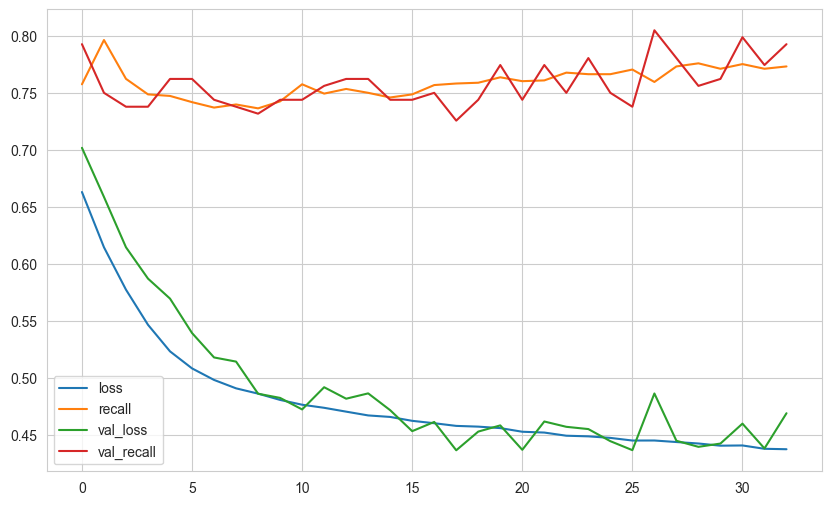

In [138]:
# As we see after we add early stop our model has been significant progress
loss_ES.plot()
plt.show()

In [139]:
loss, recall = My_Model_withES.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.46326446533203125
accuracy:  0.7555555701255798


In [140]:
y_pred_withES= My_Model_withES.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred_withES))
print(classification_report(y_test,y_pred_withES))

63/63 [==============================] - 0s 737us/step
[[1289  306]
 [  99  306]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1595
           1       0.50      0.76      0.60       405

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



In [141]:
x_pred_withES= My_Model_withES.predict(X_train) > 0.5
print(confusion_matrix(y_train , x_pred_withES))
print(classification_report(y_train,x_pred_withES))

250/250 [==============================] - 0s 690us/step
[[5366 1002]
 [ 423 1209]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      6368
           1       0.55      0.74      0.63      1632

    accuracy                           0.82      8000
   macro avg       0.74      0.79      0.76      8000
weighted avg       0.85      0.82      0.83      8000



In [142]:
y_pred_withES = My_Model_withES.predict(X_test)

63/63 [==============================] - 0s 732us/step


In [143]:
roc_auc_score(y_test, y_pred_withES)

0.8650543751693177

In [144]:
def roc_auc_plot(y_train, ptrain, y_test, ptest):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, ptrain)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, ptest)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

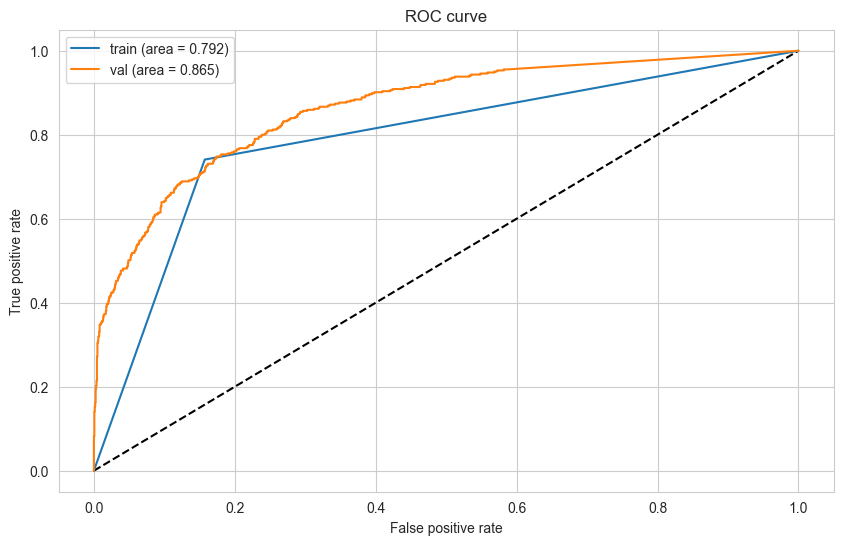

In [145]:
roc_auc_plot(y_train, x_pred_withES,y_test, y_pred_withES)

63/63 [==============================] - 0s 757us/step


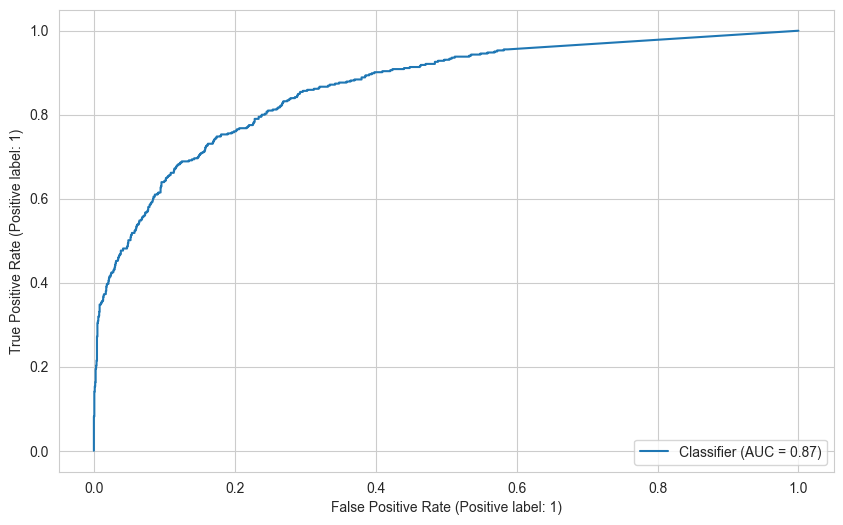

In [146]:
y_pred_withES = My_Model_withES.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_withES)

#### Monitor the "val_recall" as metric

In [147]:
tf.random.set_seed(seed)
My_Model_withES = Sequential()# So here we initializing the ANN
My_Model_withES.add(
    Dense(units=21, activation="relu", input_dim=X_train.shape[1])
)  # Here the first hidden layer
# also behaves like the input layer as well, if provided with the input_dim parameter.
My_Model_withES.add(Dense(units=16, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_withES.add(Dense(units=6, activation="relu")) # Adding Hidden Layer with activation relu
My_Model_withES.add(Dense(units=1, activation='sigmoid'))#So here in the Output Layer with activation sigmoid
#we add the Output layer with 1 neurons because we need one output, that is the customer will Closed or retained

In [148]:
My_Model_withES.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [149]:
# so here we add early stop we will monitor val_recall 
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [150]:
# We build model with epochs size 250 and batch size 32 with class weight
My_Model_withES.fit(x=X_train,y=y_train,validation_split=0.1 ,batch_size = 32, epochs = 250, verbose=1,class_weight=class_weights,callbacks=[early_stop])

Epoch 1/250
225/225 [==============================] - 1s 2ms/step - loss: 0.6796 - recall: 0.3317 - val_loss: 0.6002 - val_recall: 0.6159
Epoch 2/250
225/225 [==============================] - 0s 1ms/step - loss: 0.6194 - recall: 0.6594 - val_loss: 0.5331 - val_recall: 0.7378
Epoch 3/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5758 - recall: 0.7384 - val_loss: 0.5181 - val_recall: 0.7622
Epoch 4/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5408 - recall: 0.7548 - val_loss: 0.5072 - val_recall: 0.8110
Epoch 5/250
225/225 [==============================] - 0s 1ms/step - loss: 0.5037 - recall: 0.7698 - val_loss: 0.4747 - val_recall: 0.8293
Epoch 6/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4816 - recall: 0.7752 - val_loss: 0.4627 - val_recall: 0.8354
Epoch 7/250
225/225 [==============================] - 0s 1ms/step - loss: 0.4695 - recall: 0.7718 - val_loss: 0.4479 - val_recall: 0.8171
Epoch 8/250
225/225 [======

In [151]:
My_Model_withES.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 21)                294       
                                                                 
 dense_21 (Dense)            (None, 16)                352       
                                                                 
 dense_22 (Dense)            (None, 6)                 102       
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 755 (2.95 KB)
Trainable params: 755 (2.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [152]:
My_Model_withES.weights

[<tf.Variable 'dense_20/kernel:0' shape=(13, 21) dtype=float32, numpy=
 array([[ 0.20024681,  0.04376532,  0.38553688, -0.18942581, -0.17874996,
         -0.03856791, -0.14898704,  0.27312392,  0.00528292, -0.31926087,
          0.09050192, -0.06518344, -0.09996089, -0.26880765, -0.07081553,
         -0.09357307,  0.3514083 , -0.100586  ,  0.34992215, -0.00378598,
          0.09377264],
        [ 0.02418431,  0.03798921, -0.25174809,  0.30171445,  0.07210206,
         -0.29715154, -0.25504264, -0.34839338,  0.18174157, -0.22890194,
         -0.2820761 ,  0.07651095,  0.11276281,  0.08145039,  0.09981136,
          0.31720027,  0.21261176,  0.29929367, -0.17791772, -0.3051772 ,
         -0.15183526],
        [-0.07437752,  0.17856275, -0.27997878,  0.15439622,  0.28586334,
         -0.03161098, -0.13343075, -0.0620107 , -0.05389219,  0.08684362,
         -0.20299143, -0.18089712, -0.05853665,  0.1666215 , -0.3069836 ,
          0.36815283,  0.3369364 , -0.09674741,  0.3497734 ,  0.25327

In [153]:
loss_ES = pd.DataFrame(My_Model_withES.history.history)
loss_ES.head()

,loss,recall,val_loss,val_recall
0,0.680,0.332,0.600,0.616
1,0.619,0.659,0.533,0.738
2,0.576,0.738,0.518,0.762
3,0.541,0.755,0.507,0.811
4,0.504,0.770,0.475,0.829


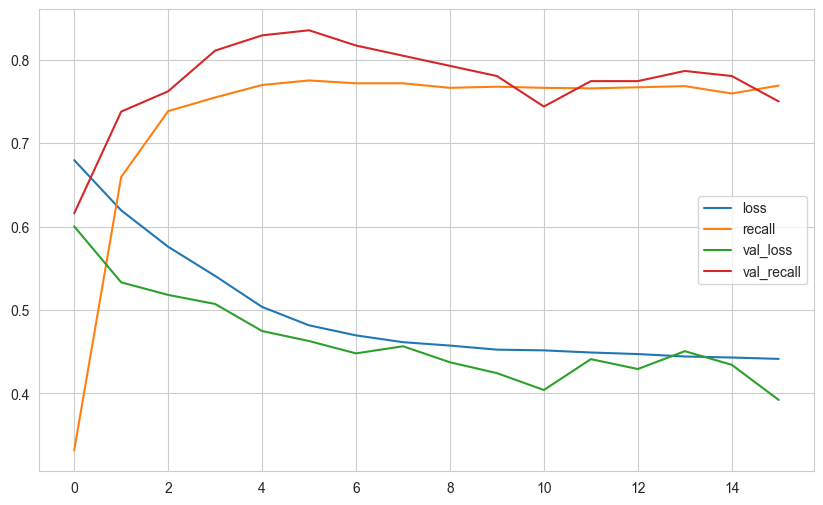

In [154]:
#As we can see in this plor, there is no progress with mentoring val_recall
loss_ES.plot()
plt.show()

In [174]:
loss, recall = My_Model_withES.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.6063679456710815
recall:  0.6839506030082703


In [156]:
y_pred_withES= My_Model_withES.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred_withES))
print(classification_report(y_test,y_pred_withES))

63/63 [==============================] - 0s 729us/step
[[1068  527]
 [ 128  277]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.77      1595
           1       0.34      0.68      0.46       405

    accuracy                           0.67      2000
   macro avg       0.62      0.68      0.61      2000
weighted avg       0.78      0.67      0.70      2000



In [157]:
roc_auc_score(y_test, y_pred_withES)

0.6767715468864893

In [158]:
def roc_auc_plot(y_train, ptrain, y_test, ptest):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, ptrain)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, ptest)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

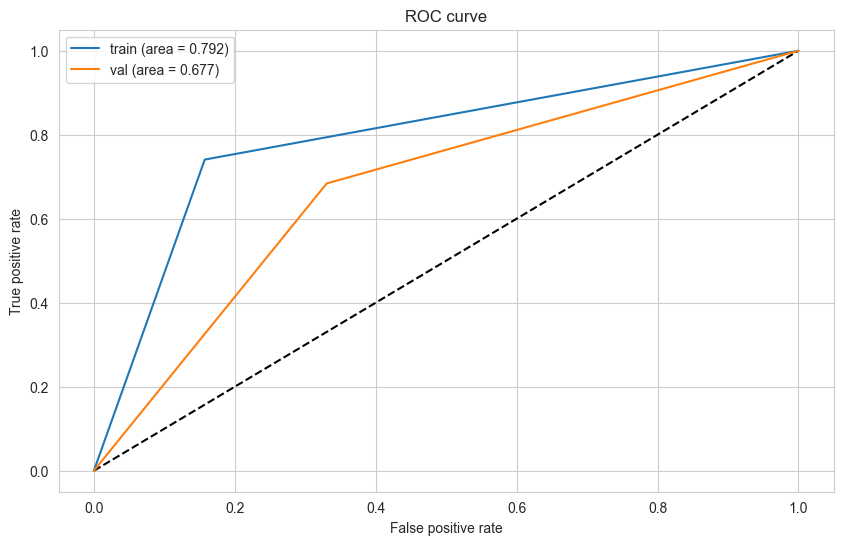

In [159]:
roc_auc_plot(y_train, x_pred_withES,y_test, y_pred_withES)

63/63 [==============================] - 0s 725us/step


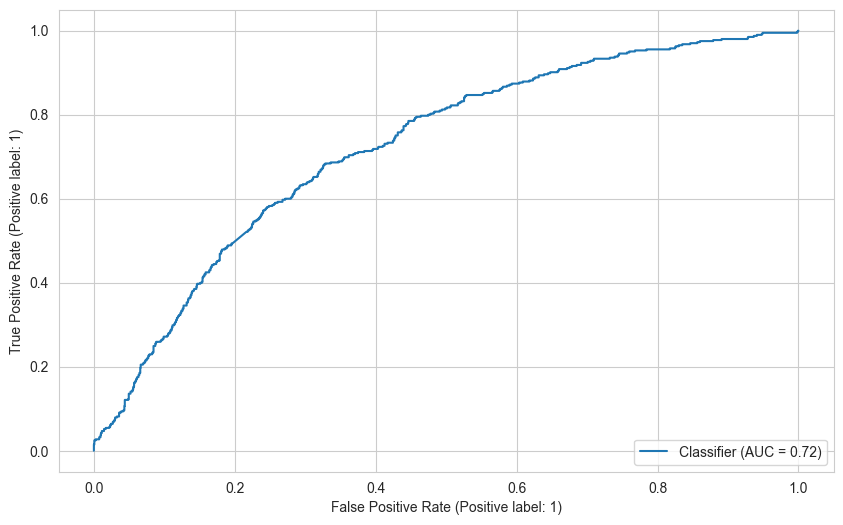

In [160]:
y_pred_withES = My_Model_withES.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_withES)

## Optuna

In [ ]:
# pip install optuna

In [162]:
# So here we add early stop with monotring val_loss 
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)
# Recall

In [163]:
trial_metric = "Recall" #here we choose the trial metric is recall
batch_size = 32# defined # of batch size 


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1) # 1e-2

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=250,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [164]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-29 16:48:49,203] A new study created in memory with name: no-name-7eda301d-d2ba-4480-9e33-9ee42dfa70ce


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-10-29 16:48:57,926] Trial 0 finished with value: 0.4962962865829468 and parameters: {'n_units1': 95, 'n_units2': 13, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.009723593172255534, 'w0': 0.04549646498578811, 'w1': 0.043174596206836106}. Best is trial 0 with value: 0.4962962865829468.


Restoring model weights from the end of the best epoch: 108.
Epoch 123: early stopping


[I 2023-10-29 16:49:34,378] Trial 1 finished with value: 0.34567901492118835 and parameters: {'n_units1': 53, 'n_units2': 107, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 3.38783450377362e-05, 'w0': 0.5846462744707985, 'w1': 0.21683850093109047}. Best is trial 0 with value: 0.4962962865829468.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-29 16:49:40,465] Trial 2 finished with value: 0.9876543283462524 and parameters: {'n_units1': 87, 'n_units2': 55, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.007371423338533742, 'w0': 0.08344443943181654, 'w1': 4.072969884607185}. Best is trial 2 with value: 0.9876543283462524.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-29 16:49:47,039] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 17, 'n_units2': 92, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.4775904180586033e-05, 'w0': 0.44370396303041854, 'w1': 0.027538720464563553}. Best is trial 2 with value: 0.9876543283462524.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-29 16:49:55,617] Trial 4 finished with value: 0.30617284774780273 and parameters: {'n_units1': 108, 'n_units2': 27, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.053766641937120614, 'w0': 0.2289075682415814, 'w1': 0.6079479180659957}. Best is trial 2 with value: 0.9876543283462524.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 16:50:00,864] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 66, 'n_units2': 98, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 8.681741845742787e-05, 'w0': 0.4335668117086996, 'w1': 0.019225255635370652}. Best is trial 2 with value: 0.9876543283462524.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-10-29 16:50:09,400] Trial 6 finished with value: 0.45185184478759766 and parameters: {'n_units1': 54, 'n_units2': 86, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.001070086585223904, 'w0': 0.7855116243704413, 'w1': 0.45751572871368107}. Best is trial 2 with value: 0.9876543283462524.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-29 16:50:16,801] Trial 7 finished with value: 0.5160493850708008 and parameters: {'n_units1': 102, 'n_units2': 38, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0059040107730210034, 'w0': 3.5945140203554096, 'w1': 4.653894395906725}. Best is trial 2 with value: 0.9876543283462524.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-29 16:50:24,002] Trial 8 finished with value: 0.4345678985118866 and parameters: {'n_units1': 94, 'n_units2': 110, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0011434671755371063, 'w0': 0.35385693366991894, 'w1': 0.18635080427976142}. Best is trial 2 with value: 0.9876543283462524.


Restoring model weights from the end of the best epoch: 85.
Epoch 100: early stopping


[I 2023-10-29 16:50:51,085] Trial 9 finished with value: 0.7876543402671814 and parameters: {'n_units1': 27, 'n_units2': 37, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0001346475953157422, 'w0': 0.022046751434340553, 'w1': 0.09451491509757241}. Best is trial 2 with value: 0.9876543283462524.


{'n_units1': 87,
 'n_units2': 55,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 0.007371423338533742,
 'w0': 0.08344443943181654,
 'w1': 4.072969884607185}

In [278]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential())# So here we initializing the ANN
model.add(Dense(unit1, activation="relu")) # Adding Hidden Layer with activation relu
model.add(Dense(unit2, activation="relu")) # Adding Hidden Layer with activation relu
model.add(Dense(1, activation="sigmoid")))#So here in the Output Layer with activation sigmoid
#we add the Output layer with 1 neurons because we need one output, that is the customer will Closed or retained
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


In [279]:
model.fit(X_train,y_train,validation_split=0.1,batch_size=32,epochs=250,callbacks=[early_stop],class_weight={0: w0, 1: w1},verbose=1,
)

Epoch 1/250
180/180 [==============================] - 2s 4ms/step - loss: 84.3187 - recall: 0.9246 - val_loss: 1026.3278 - val_recall: 0.9820
Epoch 2/250
180/180 [==============================] - 0s 2ms/step - loss: 10.9756 - recall: 0.9514 - val_loss: 407.3687 - val_recall: 0.9910
Epoch 3/250
180/180 [==============================] - 0s 2ms/step - loss: 4.7093 - recall: 0.9564 - val_loss: 99.2992 - val_recall: 0.8919
Epoch 4/250
180/180 [==============================] - 0s 2ms/step - loss: 3.1050 - recall: 0.9531 - val_loss: 110.6194 - val_recall: 0.9459
Epoch 5/250
180/180 [==============================] - 0s 2ms/step - loss: 2.4240 - recall: 0.9539 - val_loss: 104.6835 - val_recall: 0.9550
Epoch 6/250
180/180 [==============================] - 0s 2ms/step - loss: 2.3353 - recall: 0.9606 - val_loss: 162.6808 - val_recall: 1.0000
Epoch 7/250
180/180 [==============================] - 0s 2ms/step - loss: 2.4475 - recall: 0.9589 - val_loss: 113.3182 - val_recall: 0.9910
Epoch 8/250

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [280]:
his = model.history.history

<Axes: >

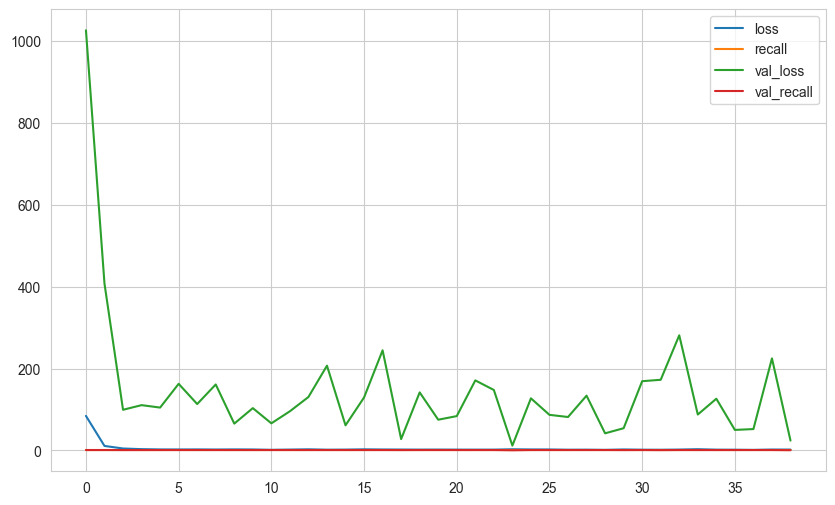

In [281]:
#As we can see from this plot, there has been no progress with optuna based on the hype that model selected to us
loss_acc = pd.DataFrame(his)
loss_acc.plot()

In [284]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  11.503439903259277
recall:  0.4054054021835327


In [285]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

63/63 [==============================] - 0s 1ms/step


In [286]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1055  538]
 [ 242  165]]
              precision    recall  f1-score   support

           0       0.81      0.66      0.73      1593
           1       0.23      0.41      0.30       407

    accuracy                           0.61      2000
   macro avg       0.52      0.53      0.51      2000
weighted avg       0.70      0.61      0.64      2000



63/63 [==============================] - 0s 2ms/step


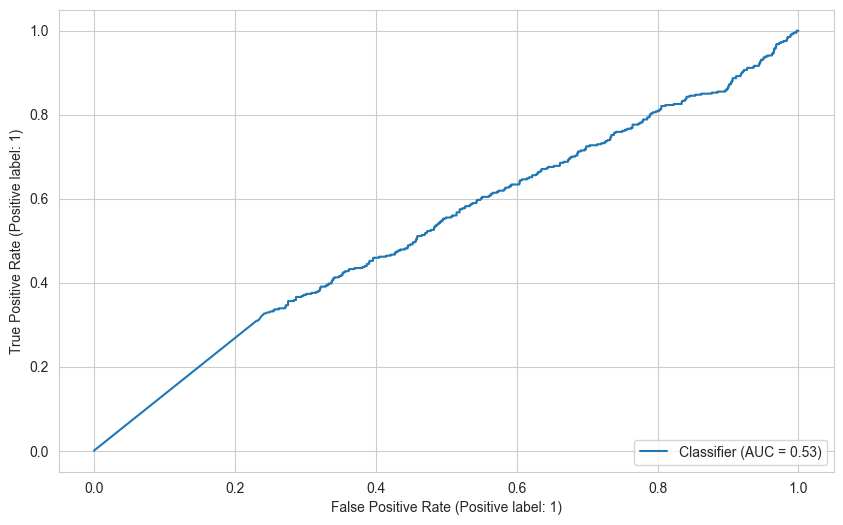

In [287]:
y_pred_p = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_p)

In [173]:
roc_auc_score(y_test, y_pred_p)

0.8143380161770966

### we use validation data in neural networks to prevent data leakage


###without class weight

In [191]:
X_try = df.drop("Exited", axis =1)
y_try = df["Exited"]


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_try, y_try, test_size = 0.2, random_state = 42,stratify=y_try)


In [193]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42,stratify=y_train)


In [194]:
sts = StandardScaler()
X_train_tra = sts.fit_transform(X_train)
X_test_tra = sts.transform(X_val)

In [195]:
seed=42
tf.random.set_seed(seed)
My_Model_val = Sequential()
My_Model_val.add(
    Dense(units=21, activation="relu", input_dim=X_train.shape[1])
)  # Here the first hidden layer
# also behaves like the input layer as well, if provided with the input_dim parameter.
My_Model_val.add(Dense(units=16, activation="relu"))
My_Model_val.add(Dense(units=6, activation="relu"))
My_Model_val.add(Dense(units=1, activation='sigmoid'))


In [200]:
My_Model_val.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [201]:
My_Model_val.fit(x=X_train_tra,
                 y=y_train ,
                 batch_size = 32 ,
                 epochs = 250 ,
                 verbose=1,
                 validation_data=(X_test_tra,y_val))

Epoch 1/250
200/200 [==============================] - 1s 2ms/step - loss: 0.5131 - recall: 0.0376 - val_loss: 0.4489 - val_recall: 0.0153
Epoch 2/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4283 - recall: 0.1388 - val_loss: 0.4188 - val_recall: 0.1656
Epoch 3/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4073 - recall: 0.2500 - val_loss: 0.4002 - val_recall: 0.3160
Epoch 4/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3884 - recall: 0.3505 - val_loss: 0.3821 - val_recall: 0.3528
Epoch 5/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3736 - recall: 0.3934 - val_loss: 0.3748 - val_recall: 0.3804
Epoch 6/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3613 - recall: 0.4371 - val_loss: 0.3646 - val_recall: 0.3742
Epoch 7/250
200/200 [==============================] - 0s 1ms/step - loss: 0.3525 - recall: 0.4486 - val_loss: 0.3573 - val_recall: 0.4110
Epoch 8/250
200/200 [======

In [202]:

loss_val = pd.DataFrame(My_Model_val.history.history)
loss_val.head()


,loss,recall,val_loss,val_recall
0,0.513,0.038,0.449,0.015
1,0.428,0.139,0.419,0.166
2,0.407,0.250,0.400,0.316
3,0.388,0.350,0.382,0.353
4,0.374,0.393,0.375,0.380


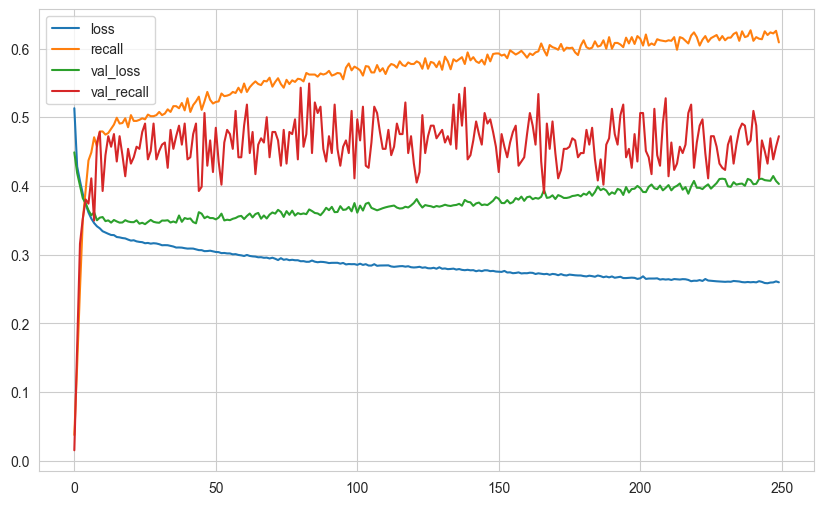

In [203]:

loss_val.plot()
plt.show()


In [204]:

loss, recall = My_Model_val.evaluate(X_test_tra, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)


loss:  0.4029427468776703
recall:  0.47239264845848083


In [205]:
y_pred_val= My_Model_withES.predict(X_test_tra) > 0.5
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))

50/50 [==============================] - 0s 776us/step
[[892 382]
 [115 211]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1274
           1       0.36      0.65      0.46       326

    accuracy                           0.69      1600
   macro avg       0.62      0.67      0.62      1600
weighted avg       0.78      0.69      0.72      1600



50/50 [==============================] - 0s 1ms/step


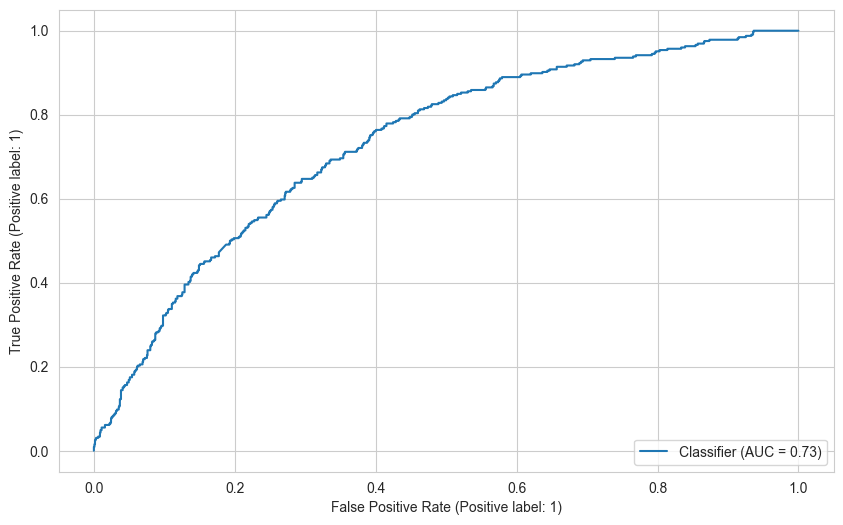

In [259]:
y_predy = My_Model_withES.predict(X_test_tra)
RocCurveDisplay.from_predictions(y_val, y_predy)

###with class weight

In [206]:
tf.random.set_seed(seed)
My_Model_valW = Sequential()
# Uncomment to explicitly add an input layer (not recommended).
# model.add(Input(shape = X_train.shape[1]))
My_Model_valW.add(
    Dense(units=21, activation="relu", input_dim=X_train.shape[1])
)  # Here the first hidden layer
# also behaves like the input layer as well, if provided with the input_dim parameter.
My_Model_valW.add(Dense(units=16, activation="relu"))
My_Model_valW.add(Dense(units=6, activation="relu"))
My_Model_valW.add(Dense(units=1, activation='sigmoid'))


In [207]:
My_Model_valW.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [208]:
My_Model_valW.fit(x=X_train_tra,
                 y=y_train ,
                 batch_size = 32 ,
                 epochs = 250 ,
                 verbose=1,
                 validation_data=(X_test_tra,y_val),class_weight=class_weights)

Epoch 1/250
200/200 [==============================] - 1s 2ms/step - loss: 0.6242 - recall: 0.6840 - val_loss: 0.5664 - val_recall: 0.6196
Epoch 2/250
200/200 [==============================] - 0s 1ms/step - loss: 0.5687 - recall: 0.6940 - val_loss: 0.5451 - val_recall: 0.6380
Epoch 3/250
200/200 [==============================] - 0s 2ms/step - loss: 0.5443 - recall: 0.7262 - val_loss: 0.5482 - val_recall: 0.7393
Epoch 4/250
200/200 [==============================] - 0s 1ms/step - loss: 0.5195 - recall: 0.7569 - val_loss: 0.5243 - val_recall: 0.7423
Epoch 5/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4977 - recall: 0.7600 - val_loss: 0.4952 - val_recall: 0.7086
Epoch 6/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4821 - recall: 0.7592 - val_loss: 0.4760 - val_recall: 0.7025
Epoch 7/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4723 - recall: 0.7538 - val_loss: 0.4804 - val_recall: 0.7301
Epoch 8/250
200/200 [======

In [211]:

loss_valW = pd.DataFrame(My_Model_valW.history.history)
loss_valW.head()

,loss,recall,val_loss,val_recall
0,0.624,0.684,0.566,0.620
1,0.569,0.694,0.545,0.638
2,0.544,0.726,0.548,0.739
3,0.520,0.757,0.524,0.742
4,0.498,0.760,0.495,0.709


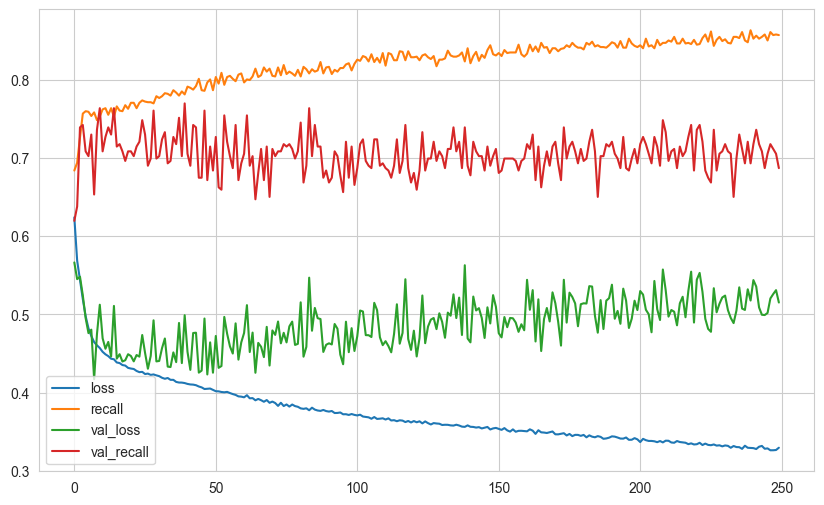

In [212]:

loss_valW.plot()
plt.show()


In [213]:

loss, recall = My_Model_valW.evaluate(X_test_tra, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)


loss:  0.5151591897010803
recall:  0.6871165633201599


In [214]:
y_pred_W= My_Model_valW.predict(X_test_tra) > 0.5
print(confusion_matrix(y_val, y_pred_W))
print(classification_report(y_val,y_pred_W))

50/50 [==============================] - 0s 745us/step
[[1030  244]
 [ 102  224]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1274
           1       0.48      0.69      0.56       326

    accuracy                           0.78      1600
   macro avg       0.69      0.75      0.71      1600
weighted avg       0.82      0.78      0.80      1600



50/50 [==============================] - 0s 968us/step


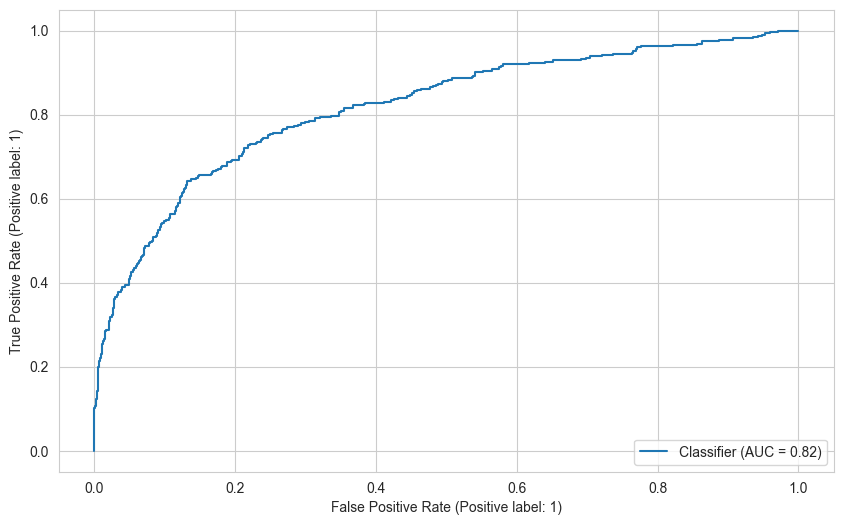

In [258]:
y_preds = My_Model_valW.predict(X_test_tra)
RocCurveDisplay.from_predictions(y_val, y_preds)

###increse learing rate with class wight 

In [215]:
tf.random.set_seed(seed)
My_Model_valL = Sequential()
# Uncomment to explicitly add an input layer (not recommended).
# model.add(Input(shape = X_train.shape[1]))
My_Model_valL.add(
    Dense(units=21, activation="relu", input_dim=X_train.shape[1])
)  # Here the first hidden layer
# also behaves like the input layer as well, if provided with the input_dim parameter.
My_Model_valL.add(Dense(units=16, activation="relu"))
My_Model_valL.add(Dense(units=6, activation="relu"))
My_Model_valL.add(Dense(units=1, activation='sigmoid'))


In [216]:
opt = Adam(learning_rate=0.01)
My_Model_valL.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [217]:
My_Model_valL.fit(x=X_train_tra,
                 y=y_train ,
                 batch_size = 32 ,
                 epochs = 250 ,
                 verbose=1,
                 validation_data=(X_test_tra,y_val),class_weight=class_weights)

Epoch 1/250
200/200 [==============================] - 1s 2ms/step - loss: 0.5400 - recall: 0.7331 - val_loss: 0.4967 - val_recall: 0.7638
Epoch 2/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4908 - recall: 0.7293 - val_loss: 0.4841 - val_recall: 0.6902
Epoch 3/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4694 - recall: 0.7515 - val_loss: 0.5179 - val_recall: 0.7669
Epoch 4/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4650 - recall: 0.7546 - val_loss: 0.4840 - val_recall: 0.7331
Epoch 5/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4609 - recall: 0.7600 - val_loss: 0.4560 - val_recall: 0.7270
Epoch 6/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4562 - recall: 0.7661 - val_loss: 0.4453 - val_recall: 0.7239
Epoch 7/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4529 - recall: 0.7661 - val_loss: 0.4899 - val_recall: 0.7485
Epoch 8/250
200/200 [======

In [218]:

loss_valL= pd.DataFrame(My_Model_valL.history.history)
loss_valL.head()

,loss,recall,val_loss,val_recall
0,0.540,0.733,0.497,0.764
1,0.491,0.729,0.484,0.690
2,0.469,0.752,0.518,0.767
3,0.465,0.755,0.484,0.733
4,0.461,0.760,0.456,0.727


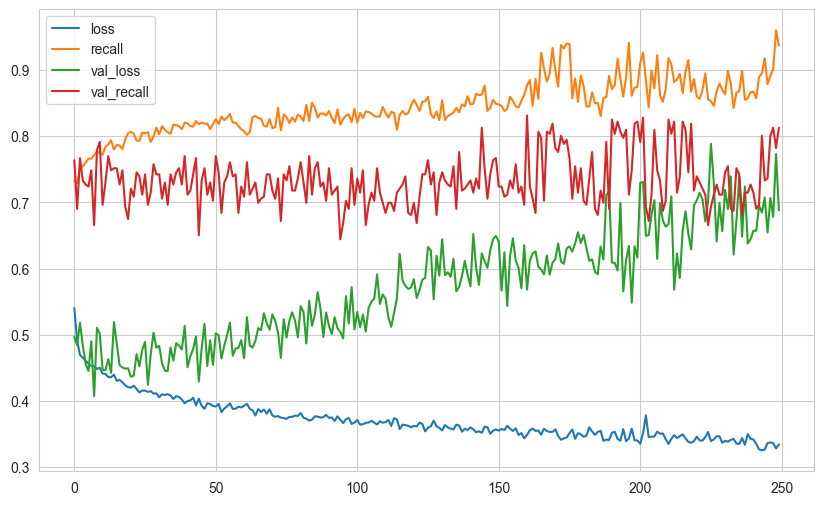

In [219]:

loss_valL.plot()
plt.show()

In [220]:
loss, recall = My_Model_valL.evaluate(X_test_tra, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.6881355047225952
recall:  0.8128834366798401


In [221]:
y_pred_L= My_Model_valL.predict(X_test_tra) > 0.5
print(confusion_matrix(y_val, y_pred_L))
print(classification_report(y_val,y_pred_L))

50/50 [==============================] - 0s 755us/step
[[872 402]
 [ 61 265]]
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      1274
           1       0.40      0.81      0.53       326

    accuracy                           0.71      1600
   macro avg       0.67      0.75      0.66      1600
weighted avg       0.83      0.71      0.74      1600



50/50 [==============================] - 0s 1ms/step


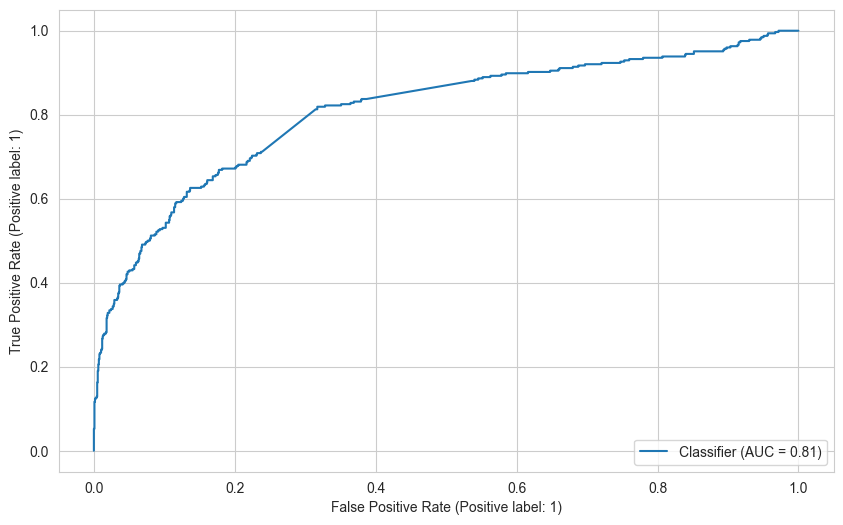

In [257]:
y_predf = My_Model_valL.predict(X_test_tra)
RocCurveDisplay.from_predictions(y_val, y_predf)

###dropout 

In [260]:
tf.random.set_seed(seed)
My_Model_withD= Sequential()

My_Model_withD.add(Dense(21, activation="relu", input_dim=X_train.shape[1]))
My_Model_withD.add(Dropout(0.3))

My_Model_withD.add(Dense(16, activation="relu"))
My_Model_withD.add(Dropout(0.3))

My_Model_withD.add(Dense(6, activation="relu"))
My_Model_withD.add(Dropout(0.3))

My_Model_withD.add(Dense(1, activation="sigmoid"))


In [261]:
opt = Adam(learning_rate=0.01)
My_Model_withD.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [263]:
My_Model_withD.fit(x=X_train_tra,
                 y=y_train ,
                 batch_size = 32 ,
                 epochs = 250 ,
                 verbose=1,
                 validation_data=(X_test_tra,y_val),class_weight=class_weights)

Epoch 1/250
200/200 [==============================] - 1s 3ms/step - loss: 0.4955 - recall: 0.7393 - val_loss: 0.4505 - val_recall: 0.7638
Epoch 2/250
200/200 [==============================] - 0s 2ms/step - loss: 0.4882 - recall: 0.7400 - val_loss: 0.4829 - val_recall: 0.7117
Epoch 3/250
200/200 [==============================] - 1s 3ms/step - loss: 0.4912 - recall: 0.7339 - val_loss: 0.4498 - val_recall: 0.7515
Epoch 4/250
200/200 [==============================] - 1s 3ms/step - loss: 0.4971 - recall: 0.7339 - val_loss: 0.4848 - val_recall: 0.7270
Epoch 5/250
200/200 [==============================] - 0s 2ms/step - loss: 0.4952 - recall: 0.7324 - val_loss: 0.4435 - val_recall: 0.7638
Epoch 6/250
200/200 [==============================] - 0s 2ms/step - loss: 0.4970 - recall: 0.7247 - val_loss: 0.4382 - val_recall: 0.7638
Epoch 7/250
200/200 [==============================] - 1s 3ms/step - loss: 0.4925 - recall: 0.7316 - val_loss: 0.4598 - val_recall: 0.7270
Epoch 8/250
200/200 [======

KeyboardInterrupt: 

In [264]:

loss_valL= pd.DataFrame(My_Model_withD.history.history)
loss_valL.head()


,loss,recall,val_loss,val_recall
0,0.495,0.739,0.451,0.764
1,0.488,0.740,0.483,0.712
2,0.491,0.734,0.450,0.752
3,0.497,0.734,0.485,0.727
4,0.495,0.732,0.444,0.764


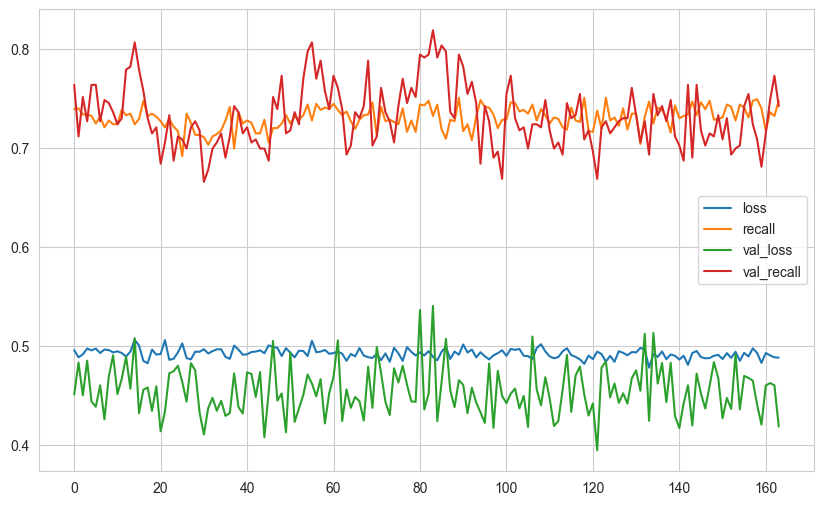

In [265]:
loss_valL.plot()
plt.show()

In [266]:
loss, recall = My_Model_withD.evaluate(X_test_tra, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5048043131828308
recall:  0.7607361674308777


In [267]:
y_pred_D= My_Model_withD.predict(X_test_tra) > 0.5
print(confusion_matrix(y_val, y_pred_D))
print(classification_report(y_val,y_pred_D))

50/50 [==============================] - 0s 2ms/step
[[1005  269]
 [  78  248]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1274
           1       0.48      0.76      0.59       326

    accuracy                           0.78      1600
   macro avg       0.70      0.77      0.72      1600
weighted avg       0.84      0.78      0.80      1600



50/50 [==============================] - 0s 2ms/step


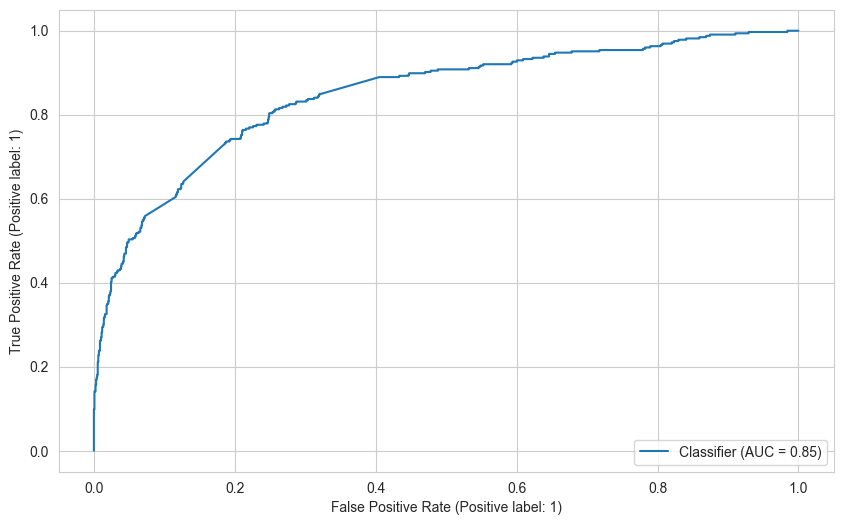

In [268]:
y_predt = My_Model_withD.predict(X_test_tra)
RocCurveDisplay.from_predictions(y_val, y_predt)

###early stoping

In [230]:
My_Model_valE = Sequential()
# Uncomment to explicitly add an input layer (not recommended).
# model.add(Input(shape = X_train.shape[1]))
My_Model_valE.add(
    Dense(units=21, activation="relu", input_dim=X_train.shape[1])
)  # Here the first hidden layer
# also behaves like the input layer as well, if provided with the input_dim parameter.
My_Model_valE.add(Dense(units=16, activation="relu"))
My_Model_valE.add(Dense(units=6, activation="relu"))
My_Model_valE.add(Dense(units=1, activation='sigmoid'))


In [231]:
My_Model_valE.compile(optimizer='Adam',loss='binary_crossentropy', metrics='Recall')

In [232]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)


In [233]:
My_Model_valE.fit(x=X_train_tra,
                 y=y_train ,
                 batch_size = 32 ,
                 epochs = 250 ,
                 verbose=1,
                 validation_data=(X_test_tra,y_val),class_weight=class_weights,callbacks=[early_stop])

Epoch 1/250
200/200 [==============================] - 1s 2ms/step - loss: 0.6324 - recall: 0.7477 - val_loss: 0.5896 - val_recall: 0.6718
Epoch 2/250
200/200 [==============================] - 0s 1ms/step - loss: 0.5611 - recall: 0.7147 - val_loss: 0.5413 - val_recall: 0.6595
Epoch 3/250
200/200 [==============================] - 0s 1ms/step - loss: 0.5288 - recall: 0.7232 - val_loss: 0.5263 - val_recall: 0.6994
Epoch 4/250
200/200 [==============================] - 0s 1ms/step - loss: 0.5017 - recall: 0.7324 - val_loss: 0.5114 - val_recall: 0.7239
Epoch 5/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4854 - recall: 0.7454 - val_loss: 0.4705 - val_recall: 0.7117
Epoch 6/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4752 - recall: 0.7431 - val_loss: 0.4735 - val_recall: 0.7301
Epoch 7/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4704 - recall: 0.7523 - val_loss: 0.4674 - val_recall: 0.7178
Epoch 8/250
200/200 [======

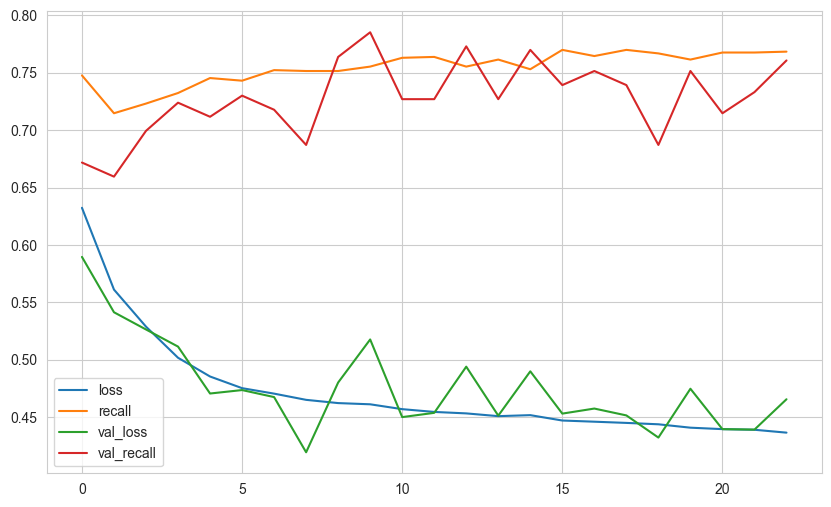

In [234]:
loss_valE= pd.DataFrame(My_Model_valE.history.history)
loss_valE.plot()
plt.show()

In [235]:
loss, recall = My_Model_valE.evaluate(X_test_tra, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.41934189200401306
recall:  0.6871165633201599


In [236]:
y_pred_E= My_Model_valE.predict(X_test_tra) > 0.5
print(confusion_matrix(y_val, y_pred_E))
print(classification_report(y_val,y_pred_E))

50/50 [==============================] - 0s 766us/step
[[1083  191]
 [ 102  224]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1274
           1       0.54      0.69      0.60       326

    accuracy                           0.82      1600
   macro avg       0.73      0.77      0.74      1600
weighted avg       0.84      0.82      0.82      1600



50/50 [==============================] - 0s 827us/step


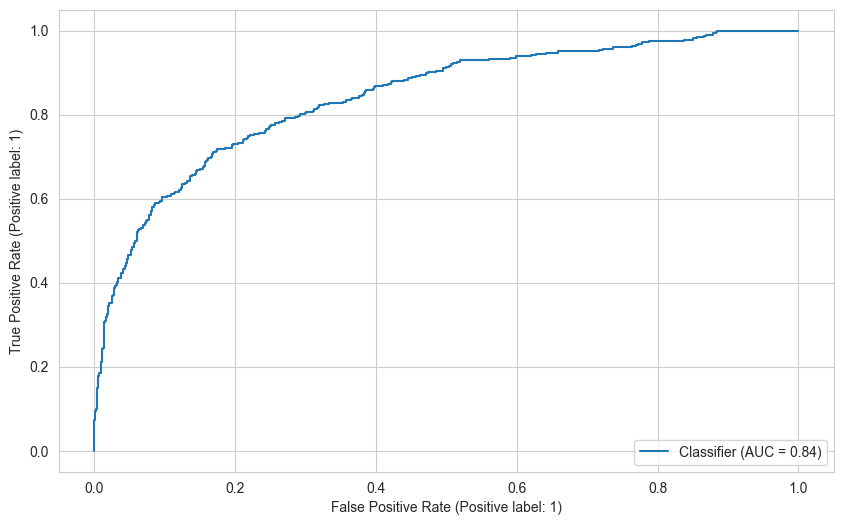

In [255]:
y_pred_tt = My_Model_valE.predict(X_test_tra)
RocCurveDisplay.from_predictions(y_val, y_pred_tt)

###mentoring "val_recall"

In [238]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [239]:
My_Model_valE.fit(x=X_train_tra,
                 y=y_train ,
                 batch_size = 32 ,
                 epochs = 250 ,
                 verbose=1,
                 validation_data=(X_test_tra,y_val),class_weight=class_weights,callbacks=[early_stop])

Epoch 1/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4628 - recall: 0.7569 - val_loss: 0.4623 - val_recall: 0.7301
Epoch 2/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4610 - recall: 0.7623 - val_loss: 0.4806 - val_recall: 0.7301
Epoch 3/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4592 - recall: 0.7515 - val_loss: 0.4798 - val_recall: 0.7393
Epoch 4/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4560 - recall: 0.7538 - val_loss: 0.4803 - val_recall: 0.7423
Epoch 5/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4536 - recall: 0.7615 - val_loss: 0.4444 - val_recall: 0.7178
Epoch 6/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4516 - recall: 0.7577 - val_loss: 0.4607 - val_recall: 0.7209
Epoch 7/250
200/200 [==============================] - 0s 1ms/step - loss: 0.4513 - recall: 0.7592 - val_loss: 0.4598 - val_recall: 0.7393
Epoch 8/250
200/200 [======

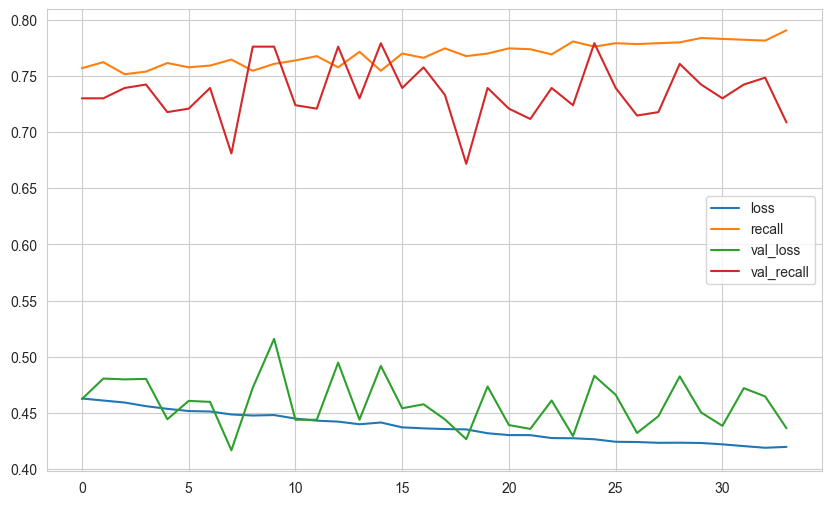

In [240]:
loss_valE= pd.DataFrame(My_Model_valE.history.history)
loss_valE.plot()
plt.show()

In [241]:
loss, recall = My_Model_valE.evaluate(X_test_tra, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4266202449798584
recall:  0.6717791557312012


In [251]:
loss, recall = My_Model_valE.evaluate(X_train_tra, y_train, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.38654038310050964
recall:  0.7216257452964783


In [242]:
y_pred_E= My_Model_valE.predict(X_test_tra) > 0.5
print(confusion_matrix(y_val, y_pred_E))
print(classification_report(y_val,y_pred_E))

50/50 [==============================] - 0s 744us/step
[[1081  193]
 [ 107  219]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1274
           1       0.53      0.67      0.59       326

    accuracy                           0.81      1600
   macro avg       0.72      0.76      0.74      1600
weighted avg       0.83      0.81      0.82      1600



50/50 [==============================] - 0s 887us/step


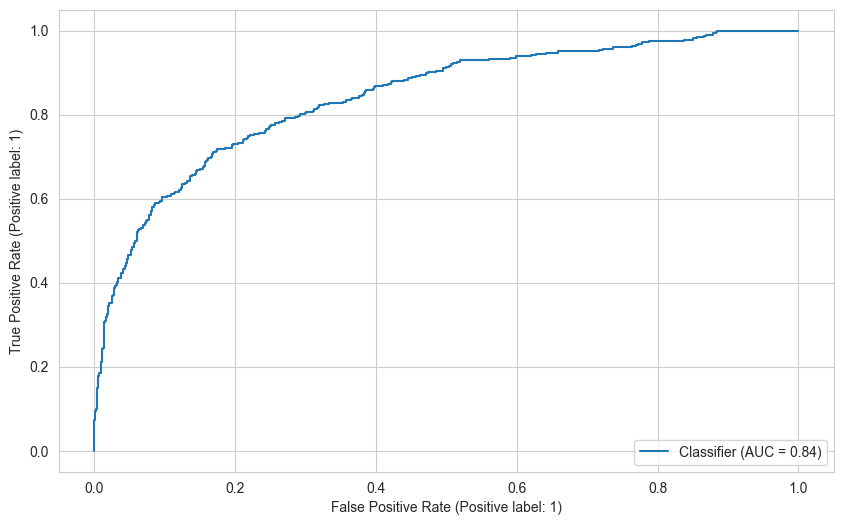

In [254]:
y_pred_t = My_Model_valE.predict(X_test_tra)
RocCurveDisplay.from_predictions(y_val, y_pred_t)

#optuna

In [243]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [244]:
trial_metric = "Recall" #val_recall
batch_size = 32


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1) # 1e-2

    modeloptna = Sequential()
    modeloptna.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    modeloptna.add(Dense(n_units2, activation="relu"))
    modeloptna.add(Dense(1, activation="sigmoid"))
    modeloptna.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return modeloptna



def objective(trial):
    modeloptna = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    modeloptna.fit(
        X_train,
        y_train,
        validation_data=(X_test_tra,y_val),
        batch_size=batch_size,
        epochs=250,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = modeloptna.evaluate(X_test_tra, y_val, verbose=0)[1]
    return score

In [245]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-29 22:43:54,355] A new study created in memory with name: no-name-4178f2bf-f0a2-4282-b23c-e4b59664c617


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 22:43:58,770] Trial 0 finished with value: 0.1809815913438797 and parameters: {'n_units1': 12, 'n_units2': 14, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0005469134599508109, 'w0': 0.19606110793257395, 'w1': 2.823664010217347}. Best is trial 0 with value: 0.1809815913438797.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 22:44:03,085] Trial 1 finished with value: 0.08282208442687988 and parameters: {'n_units1': 31, 'n_units2': 69, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00017415309680096945, 'w0': 0.0571319712454779, 'w1': 0.7363878167192408}. Best is trial 0 with value: 0.1809815913438797.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 22:44:07,583] Trial 2 finished with value: 0.12883435189723969 and parameters: {'n_units1': 16, 'n_units2': 16, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.1225944457929986, 'w0': 0.048150752613999606, 'w1': 0.013003664921607755}. Best is trial 0 with value: 0.1809815913438797.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-29 22:44:12,936] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 9, 'n_units2': 71, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002792787998640601, 'w0': 0.012916131059259022, 'w1': 0.03295224082065681}. Best is trial 0 with value: 0.1809815913438797.


Restoring model weights from the end of the best epoch: 39.
Epoch 54: early stopping


[I 2023-10-29 22:44:25,270] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 26, 'n_units2': 27, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.008700296173125016, 'w0': 0.24994117514567835, 'w1': 0.4085760512178758}. Best is trial 0 with value: 0.1809815913438797.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 22:44:29,270] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 9, 'n_units2': 109, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.023260679548003548, 'w0': 2.8406283795766067, 'w1': 0.0184309610066736}. Best is trial 0 with value: 0.1809815913438797.


Restoring model weights from the end of the best epoch: 122.
Epoch 137: early stopping


[I 2023-10-29 22:44:59,705] Trial 6 finished with value: 0.30674847960472107 and parameters: {'n_units1': 110, 'n_units2': 78, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00012074473733178143, 'w0': 0.33917754097241803, 'w1': 1.096875237860567}. Best is trial 6 with value: 0.30674847960472107.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-29 22:45:04,362] Trial 7 finished with value: 0.1871165633201599 and parameters: {'n_units1': 104, 'n_units2': 120, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.022057776985855593, 'w0': 0.21888758310556253, 'w1': 1.596679317309366}. Best is trial 6 with value: 0.30674847960472107.


Restoring model weights from the end of the best epoch: 119.
Epoch 134: early stopping


[I 2023-10-29 22:45:35,169] Trial 8 finished with value: 0.696319043636322 and parameters: {'n_units1': 83, 'n_units2': 22, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 5.8676741666171964e-05, 'w0': 0.01548033883354602, 'w1': 1.5279830998314483}. Best is trial 8 with value: 0.696319043636322.


Restoring model weights from the end of the best epoch: 50.
Epoch 65: early stopping


[I 2023-10-29 22:45:49,585] Trial 9 finished with value: 0.11042945086956024 and parameters: {'n_units1': 26, 'n_units2': 94, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 8.443446804419e-05, 'w0': 0.014198047263100626, 'w1': 0.12374128838571125}. Best is trial 8 with value: 0.696319043636322.


{'n_units1': 83,
 'n_units2': 22,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 5.8676741666171964e-05,
 'w0': 0.01548033883354602,
 'w1': 1.5279830998314483}

In [270]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

modeloptna = Sequential()
modeloptna.add(Dense(unit1, activation="relu"))
modeloptna.add(Dense(unit2, activation="relu"))
modeloptna.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
modeloptna.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


In [272]:
modeloptna.fit(x=X_train_tra,
                 y=y_train ,
                 batch_size = 32 ,
                 epochs = 250 ,
                 verbose=1,
                 validation_data=(X_test_tra,y_val),class_weight={0: w0, 1: w1},callbacks=[early_stop])

Epoch 1/250
200/200 [==============================] - 2s 3ms/step - loss: 0.1008 - recall: 0.9939 - val_loss: 1.4038 - val_recall: 1.0000
Epoch 2/250
200/200 [==============================] - 1s 3ms/step - loss: 0.0697 - recall: 1.0000 - val_loss: 1.7332 - val_recall: 1.0000
Epoch 3/250
200/200 [==============================] - 1s 3ms/step - loss: 0.0572 - recall: 1.0000 - val_loss: 1.9746 - val_recall: 1.0000
Epoch 4/250
200/200 [==============================] - 1s 3ms/step - loss: 0.0522 - recall: 1.0000 - val_loss: 2.1400 - val_recall: 1.0000
Epoch 5/250
200/200 [==============================] - 1s 3ms/step - loss: 0.0499 - recall: 1.0000 - val_loss: 2.2332 - val_recall: 1.0000
Epoch 6/250
200/200 [==============================] - 0s 2ms/step - loss: 0.0487 - recall: 1.0000 - val_loss: 2.2759 - val_recall: 1.0000
Epoch 7/250
200/200 [==============================] - 1s 3ms/step - loss: 0.0480 - recall: 1.0000 - val_loss: 2.2892 - val_recall: 1.0000
Epoch 8/250
200/200 [======

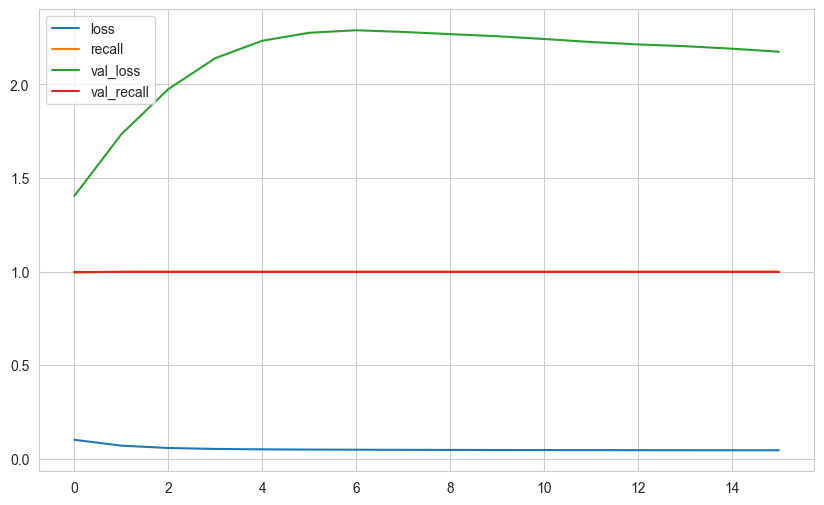

In [273]:
loss_valO= pd.DataFrame(modeloptna.history.history)
loss_valO.plot()
plt.show()

In [274]:
loss, recall = modeloptna.evaluate(X_test_tra, y_val, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  1.4037531614303589
recall:  1.0


In [275]:
loss, recall = modeloptna.evaluate(X_train_tra, y_train, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  1.4082494974136353
recall:  1.0


In [276]:
y_pred_O= modeloptna.predict(X_test_tra) > 0.5
print(confusion_matrix(y_val, y_pred_O))
print(classification_report(y_val,y_pred_O))

50/50 [==============================] - 0s 1ms/step
[[   0 1274]
 [   0  326]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1274
           1       0.20      1.00      0.34       326

    accuracy                           0.20      1600
   macro avg       0.10      0.50      0.17      1600
weighted avg       0.04      0.20      0.07      1600



50/50 [==============================] - 0s 1ms/step


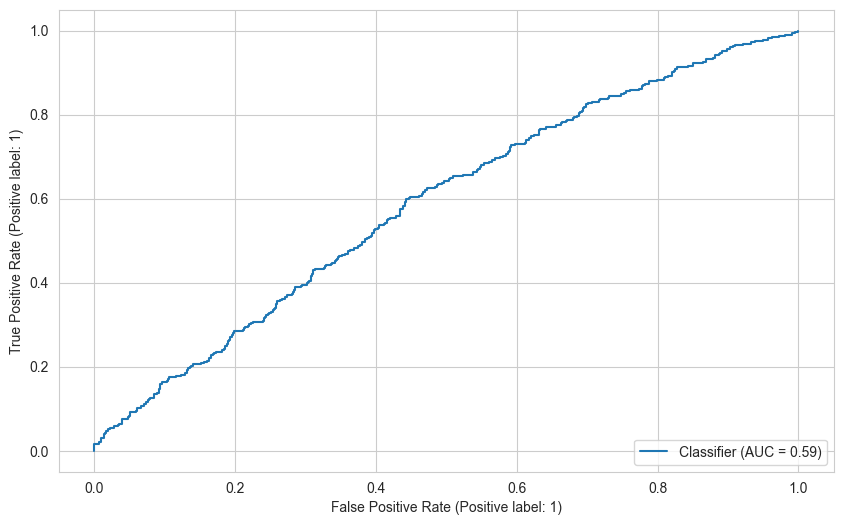

In [277]:
y_pred_tr = modeloptna.predict(X_test_tra)
RocCurveDisplay.from_predictions(y_val, y_pred_tr)

# Final Model and Model Deployment

In [ ]:
pickle.dump(scaler, open("scaler_churn_pred", "wb"))

In [301]:
# So, after investigating all of the models, we conclude that the dropout is the best one.
tf.random.set_seed(seed)
My_Model_final = Sequential()# So here we initializing the ANN

My_Model_final.add(Dense(21, activation="relu", input_dim=X_train.shape[1]))
My_Model_final.add(Dropout(0.3))# Adding Dropout with 0.3

My_Model_final.add(Dense(16, activation="relu"))# Adding Hidden Layer with activation relu
My_Model_final.add(Dropout(0.3))# Adding Dropout with 0.3

My_Model_final.add(Dense(6, activation="relu"))# Adding Hidden Layer with activation relu
My_Model_final.add(Dropout(0.3))# Adding Dropout with 0.3

My_Model_final.add(Dense(1, activation="sigmoid"))#So here in the Output Layer with activation sigmoid
#we add the Output layer with 1 neurons because we need one output, that is the customer will Closed or retained


In [302]:
# So we build our model here by selecting learning rate=0.001 and Adam as the optimizer method and loss fun as the binary
# and Because we have inconsistent data, as shown in the graph, we will focus on recall.
opt = Adam(learning_rate=0.001)
My_Model_final.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [303]:
# We build model with epochs size 250 and batch size 32 with class weight
My_Model_final.fit(x=X_train_tra,y=y_train,validation_data=(X_test, y_test) ,batch_size = 32, epochs = 250, verbose=1,class_weight=class_weights)

Epoch 1/250
200/200 [==============================] - 2s 4ms/step - loss: 0.6908 - recall: 0.5989 - val_loss: 1081.2013 - val_recall: 0.8206
Epoch 2/250
200/200 [==============================] - 0s 2ms/step - loss: 0.6611 - recall: 0.5123 - val_loss: 3562.8259 - val_recall: 1.0000
Epoch 3/250
200/200 [==============================] - 0s 2ms/step - loss: 0.6401 - recall: 0.5452 - val_loss: 6030.7329 - val_recall: 1.0000
Epoch 4/250
200/200 [==============================] - 1s 3ms/step - loss: 0.6206 - recall: 0.5813 - val_loss: 5998.6919 - val_recall: 1.0000
Epoch 5/250
200/200 [==============================] - 1s 3ms/step - loss: 0.6177 - recall: 0.5675 - val_loss: 3283.8335 - val_recall: 1.0000
Epoch 6/250
200/200 [==============================] - 1s 3ms/step - loss: 0.6094 - recall: 0.6227 - val_loss: 4700.8262 - val_recall: 1.0000
Epoch 7/250
200/200 [==============================] - 0s 2ms/step - loss: 0.6018 - recall: 0.5966 - val_loss: 6526.7700 - val_recall: 1.0000
Epoch 

In [304]:
# print all summary
My_Model_final.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 21)                294       
                                                                 
 dropout_15 (Dropout)        (None, 21)                0         
                                                                 
 dense_133 (Dense)           (None, 16)                352       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_134 (Dense)           (None, 6)                 102       
                                                                 
 dropout_17 (Dropout)        (None, 6)                 0         
                                                                 
 dense_135 (Dense)           (None, 1)               

In [305]:
My_Model_final.weights

[<tf.Variable 'dense_132/kernel:0' shape=(13, 21) dtype=float32, numpy=
 array([[-1.48233011e-01, -4.77273166e-02,  2.15801764e-02,
         -7.84921795e-02, -4.89545017e-02, -1.33184105e-01,
          9.37472060e-02, -3.20295431e-02, -6.83234259e-02,
          7.24465847e-02, -3.78652997e-02, -9.03804824e-02,
          1.94750670e-02,  4.96151187e-02,  1.74954738e-02,
          1.38376672e-02,  2.19479010e-01, -2.10206360e-01,
         -2.60871798e-01,  1.54985398e-01,  1.27214983e-01],
        [ 6.24607325e-01,  3.92858267e-01, -9.99233007e-01,
         -3.95912975e-01,  5.69034874e-01,  2.60644972e-01,
         -2.89985627e-01, -8.39278936e-01,  2.03598097e-01,
          2.53694355e-01,  5.36953032e-01,  2.27153704e-01,
         -8.75754118e-01,  2.31057152e-01,  5.37016928e-01,
         -8.97102177e-01, -3.04480791e-01,  8.36657062e-02,
         -8.60753357e-01,  2.59014785e-01, -9.65150893e-01],
        [ 6.84285313e-02,  2.96705067e-02,  6.65446231e-03,
          8.52371231e-02, 

In [306]:
My_Model_final.history.history

{'loss': [0.6907793283462524,
  0.6610680222511292,
  0.6400554776191711,
  0.6205675601959229,
  0.6176965236663818,
  0.6094337701797485,
  0.601790189743042,
  0.5936418771743774,
  0.5808174014091492,
  0.5894843339920044,
  0.5878040790557861,
  0.582272469997406,
  0.5767129063606262,
  0.5668653249740601,
  0.5663596987724304,
  0.5590887665748596,
  0.5503930449485779,
  0.554075300693512,
  0.5488837957382202,
  0.5493742823600769,
  0.5402579307556152,
  0.5429224967956543,
  0.5348184704780579,
  0.5353359580039978,
  0.5320897698402405,
  0.5291352272033691,
  0.5267846584320068,
  0.5341989398002625,
  0.5324194431304932,
  0.5299936532974243,
  0.5269573330879211,
  0.5164597034454346,
  0.507969319820404,
  0.5173825621604919,
  0.5239852666854858,
  0.5178308486938477,
  0.5109705328941345,
  0.5155689716339111,
  0.5174695253372192,
  0.522061288356781,
  0.5052977204322815,
  0.508090615272522,
  0.5109419822692871,
  0.5104516744613647,
  0.5028694272041321,
  0.5041

In [313]:
loss_DO = pd.DataFrame(My_Model_final.history.history)
loss_DO.head()

""


In [ ]:
My_Model_final.save("model_churn.h5") 

In [ ]:
model_ch_exited = load_model("model_churn.h5")
scaler_ch_exited = pickle.load(open("scaler_churn_pred", "rb"))

## Prediction

In [ ]:
final_churn = df.drop("Exited", axis=1).iloc[[8], :]
final_churn

In [ ]:
single_ch = scaler_ch_exited.transform(final_churn)
single_ch

In [ ]:
model_ch_exited.predict(single_house)

In [ ]:
df.iloc[0][0]

In [315]:
print(My_Model_final.predict(sts.transform([[1,0,799, 1, 0, 36, 7, 40, 0.000, 1, 0, 1, 42085.580]])) > 0.5)

1/1 [==============================] - 0s 92ms/step
[[ True]]


####our model predicts the customer is closed with bank 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___